### Stack Overflow Survey Analysis

### Import the required packages

In [1]:
#!pip install geopandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Load the data

In [3]:
# Loading 2022 survey dataset
df_2022 = pd.read_csv('data/2022/survey_results_public.csv')
df_2022.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [4]:
#Loading 2023 survey dataset 
df_2023 = pd.read_csv('data/2023/survey_results_public.csv')
df_2023.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


### Understanding the data

In [5]:
df_2023.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [6]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [7]:
df_2023.describe().T

,count,mean,std,min,25%,50%,75%,max
ResponseId,89184.0,4.459250e+04,2.574535e+04,1.0,22296.75,44592.5,66888.25,8.918400e+04
CompTotal,48225.0,1.036807e+42,2.276847e+44,0.0,63000.00,115000.0,230000.00,5.000000e+46
WorkExp,43579.0,1.140513e+01,9.051989e+00,0.0,5.00,9.0,16.00,5.000000e+01
ConvertedCompYearly,48019.0,1.031101e+05,6.814188e+05,1.0,43907.00,74963.0,121641.00,7.435143e+07


### Comparison between 2022 and 2023 Survey Data

##### Checking the shape of 2022 and 2023 survey dataset

In [11]:
respondents_2022 = df_2022.shape[0]
respondents_2022

73268

In [12]:
respondents_2023 = df_2023.shape[0]
respondents_2023

89184

In [13]:
respondents_increase = round(((respondents_2023 - respondents_2022)/ respondents_2022)*100)
print(f'There is a {respondents_increase}%  rise in participants from 2022 to 2023')

There is a 22%  rise in participants from 2022 to 2023


#### Copy of the initial dataframe 

In [15]:
df = df_2023.copy()
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


#### Cleaning the Data

#### Set the index to ResponseId column and Drop the columns that are no longer needed for survey after detailed look at each and every column

In [16]:
df = df.set_index('ResponseId')
df.drop(columns=["Q120",'MainBranch','TechList','NEWSOSites','SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', \
       'SOAI', 'AISelect', 'AISent', 'AIAcc', 'AIBen','AIToolNot interested in Using', 'AINextVery different',\
       'AINextNeither different nor similar', 'AINextSomewhat similar','AINextVery similar', 'AINextSomewhat different',\
        'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4','Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8',\
       'Frequency_1', 'Frequency_2', 'Frequency_3', 'TimeSearching','TimeAnswering','SurveyLength','SurveyEase'], inplace=True)

In [17]:
df.shape

(89184, 49)

#### Checking for Duplicate rows

In [18]:
df.duplicated().sum()

1204

In [19]:
df[df.duplicated()]

,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,AIDevHaveWorkedWith,AIDevWantToWorkWith,AIToolInterested in Using,AIToolCurrently Using,TBranch,ICorPM,WorkExp,ProfessionalTech,Industry,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
305,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
734,45-54 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
876,45-54 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
915,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88821,35-44 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88829,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88831,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Looking at the duplicate rows, most of the responses are empty. Dropping these rows as its no longer needed for analysis

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.shape

(87980, 49)

### Distribution Analysis
<strong>Distribution by job roles</strong>

In [22]:
# Setting Seaborn theme for visualizations
sns.set_theme(style="white", context="talk")
sns.set(rc={'figure.figsize':(10,8)})
sns.set_context("paper")

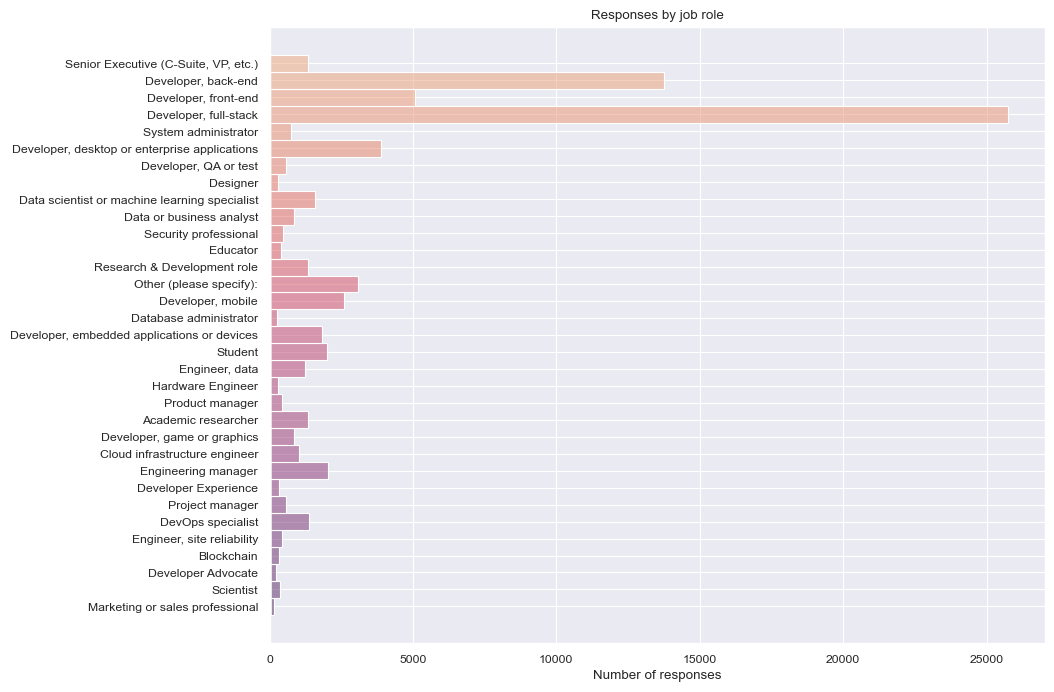

In [23]:
sns.histplot(df, y='DevType', hue ='DevType', palette='flare',legend=None).set(xlabel='Number of responses', ylabel='', title='Responses by job role'); 


Based on the job roles, Full Stack, Back-end and Front-end developers are the main respondents of the survey.

<strong>Distribution by EdLevel</strong>

In [24]:
df['EdLevel'].unique()

array([nan, 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else'], dtype=object)

In [25]:
# Setting Seaborn theme for visualizations
sns.set_theme(style="white", context="talk")
sns.set(rc={'figure.figsize':(9,4)})
sns.set_context("paper")

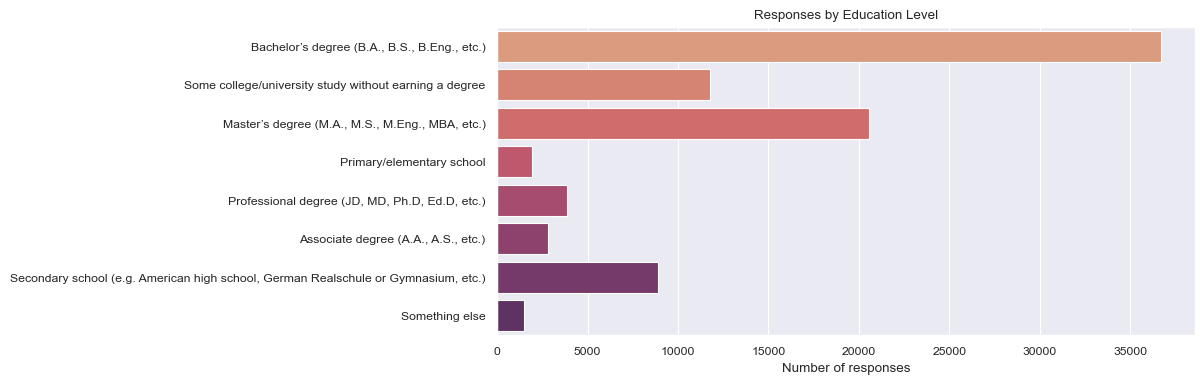

In [28]:
sns.countplot(df, y='EdLevel', hue ='EdLevel', palette='flare',legend=None).set(xlabel='Number of responses', ylabel='', title='Responses by Education Level'); 

The majority of survey participants have attained a bachelor's degree and half of the respondents have masters degree as their highest attained qualification.

#### Distribution by Industry

In [233]:
df['Industry'].dtype

dtype('O')

In [265]:
df['Industry'].value_counts()

Industry
Information Services, IT, Software Development, or other Technology    18159
Financial Services                                                      4421
Other                                                                   4011
Manufacturing, Transportation, or Supply Chain                          2607
Healthcare                                                              2216
Retail and Consumer Services                                            1955
Higher Education                                                        1242
Advertising Services                                                     786
Insurance                                                                707
Oil & Gas                                                                276
Legal Services                                                           210
Wholesale                                                                184
Name: count, dtype: int64

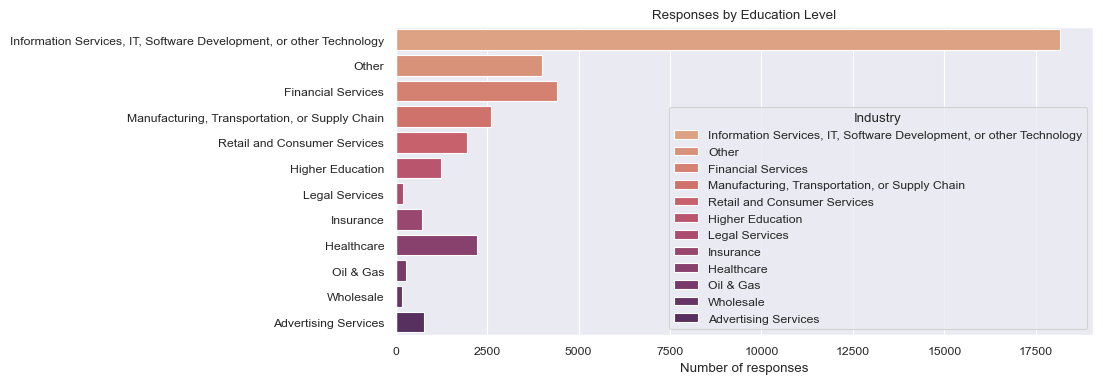

In [266]:
sns.countplot(df, y='Industry', hue ='Industry', palette='flare').set(xlabel='Number of responses', ylabel='', title='Responses by Education Level'); 

The majority of respondents are working in Information Services, IT, Software Development, or other Technology.

<strong>Distribution by age group</strong>

In [11]:
df['Age'].unique()

array([nan, '25-34 years old', '35-44 years old', 'Under 18 years old',
       '18-24 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

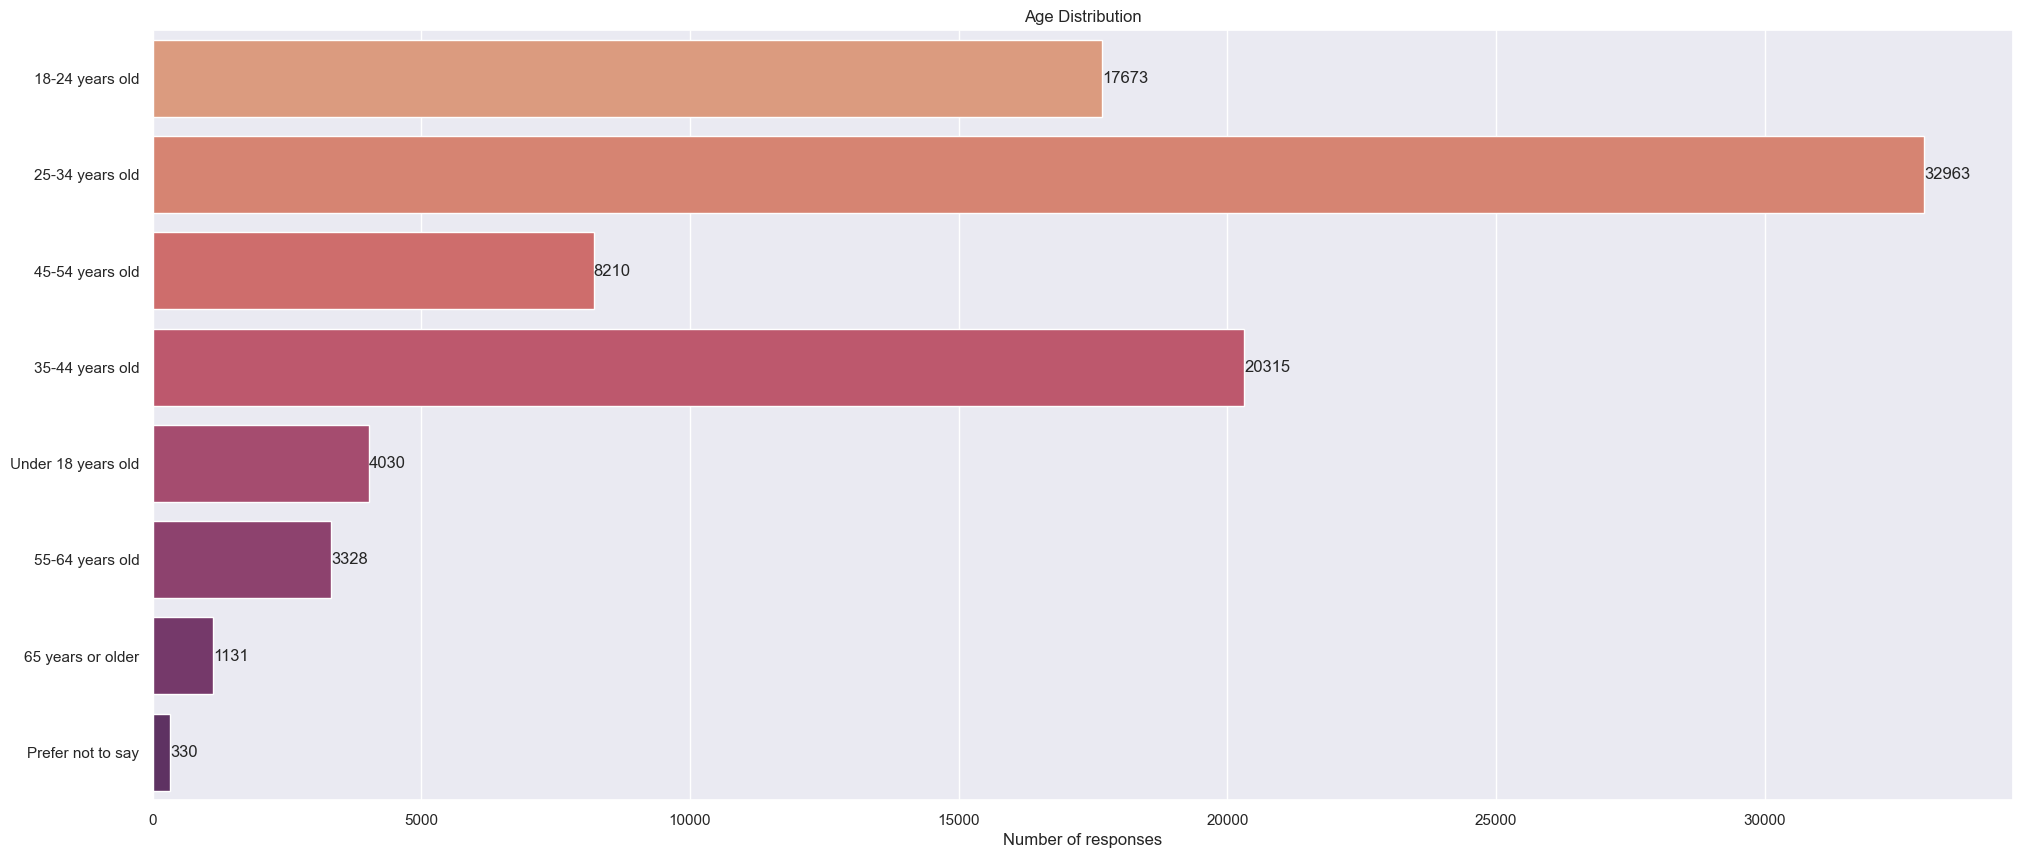

In [264]:
ax = sns.countplot(data=df, y='Age', palette='flare')
ax.set(xlabel='Number of responses', ylabel='', title='Age Distribution')
for container in ax.containers:
    ax.bar_label(container)

Around 40% of professional developers fall within the age range of 25 to 34 years old.

<strong>Distribution by Country</strong>

In [29]:
df['Country'].unique()

array([nan, 'United States of America', 'Philippines',
       'United Kingdom of Great Britain and Northern Ireland', 'Finland',
       'India', 'Australia', 'Netherlands', 'Germany', 'Sweden', 'France',
       'Albania', 'Nigeria', 'Spain', 'South Africa', 'Belgium', 'Italy',
       'Brazil', 'Portugal', 'Bangladesh', 'Canada', 'Argentina',
       'Switzerland', 'Sri Lanka', 'Poland', 'Lebanon', 'Lithuania',
       'Serbia', 'Cyprus', 'China', 'Bahrain',
       'Iran, Islamic Republic of...', 'Pakistan', 'Egypt',
       'Russian Federation', 'Turkey', 'Slovakia', 'Latvia', 'Greece',
       'Austria', 'Denmark', 'Israel', 'Norway', 'Hungary', 'Singapore',
       'United Arab Emirates', 'Croatia', 'Czech Republic', 'Kosovo',
       'Nepal', 'Slovenia', 'Romania', 'Luxembourg', 'Indonesia',
       'Tunisia', 'Republic of Korea', 'Viet Nam', 'Ukraine', 'Kenya',
       'Nomadic', 'Dominican Republic', 'Morocco', 'Uzbekistan',
       'Belarus', 'Isle of Man', 'Estonia', 'Bulgaria',
       '

In [30]:
country_data = df['Country'].value_counts()


In [31]:
country_df = pd.DataFrame({'CountryName':country_data.index, 'ResponseCount':country_data.values})
country_df.head()

,CountryName,ResponseCount
0,United States of America,18646
1,Germany,7328
2,India,5625
3,United Kingdom of Great Britain and Northern I...,5552
4,Canada,3507


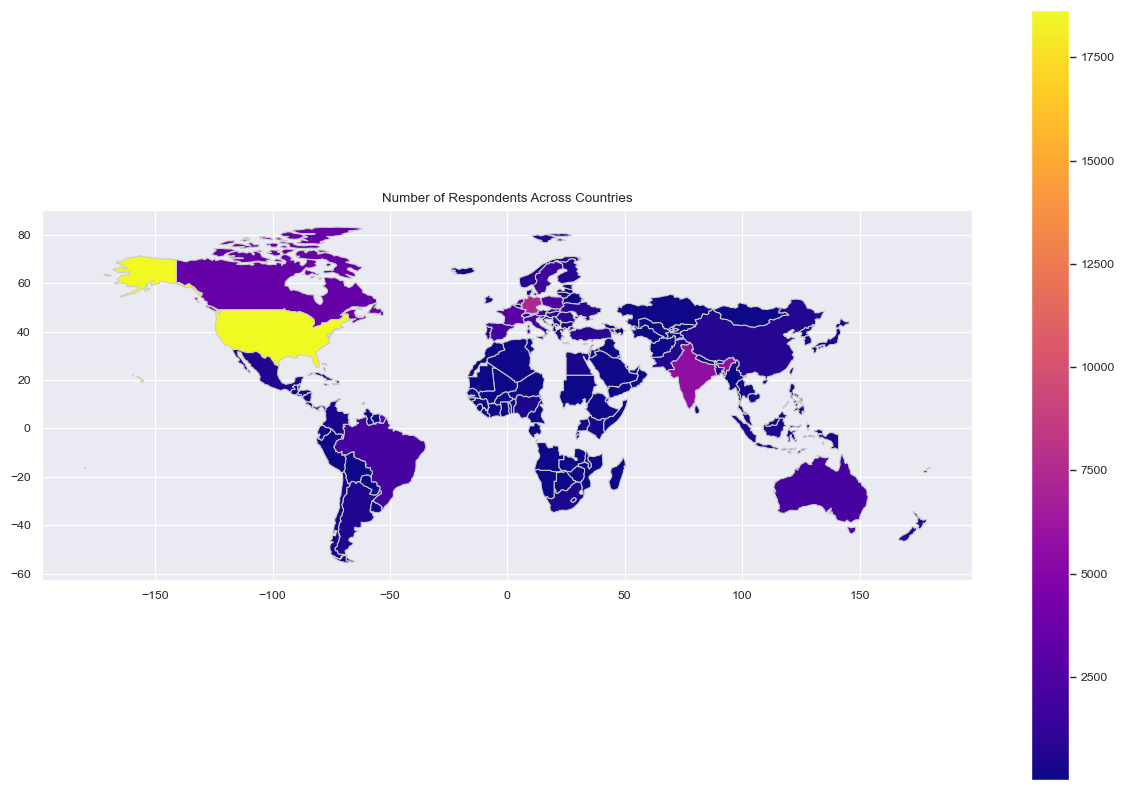

In [32]:
# Assuming 'world' is a GeoDataFrame containing world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world map with percentage data
merged_data = world.merge(country_df, left_on='name', right_on='CountryName')

# Create a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='ResponseCount', cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Number of Respondents Across Countries')
plt.show()

There are few areas thats missing either no responses from those countries or names are different in the two dataframes. Hence mapping the country names

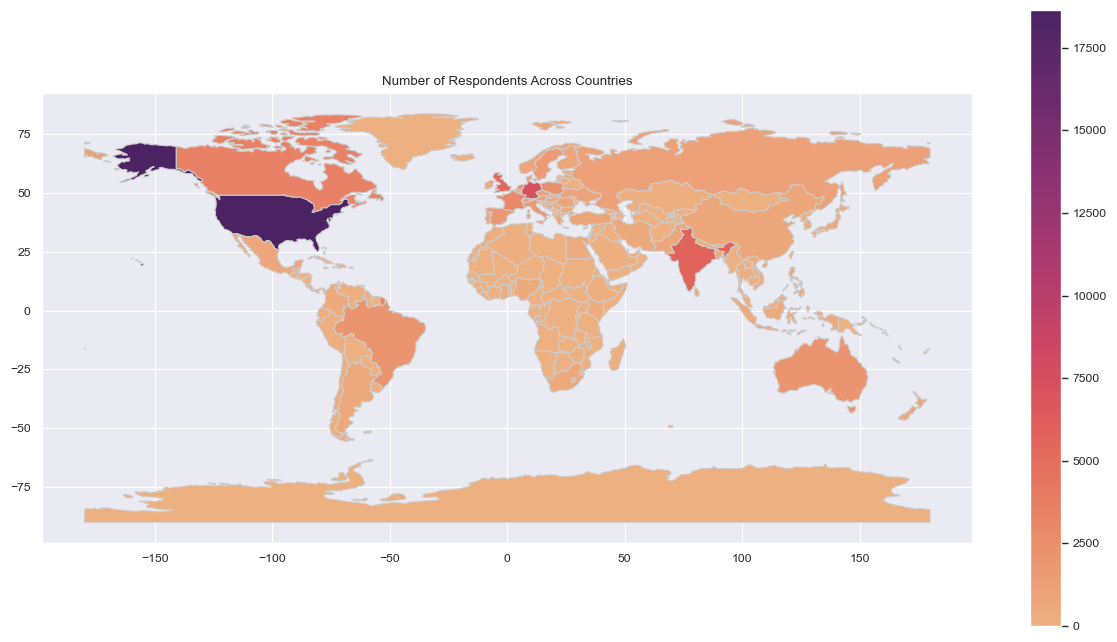

In [35]:
# mapping between country names in country_df and world
name_mapping = {
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'Iran, Islamic Republic of...': 'Iran',
    'Venezuela, Bolivarian Republic of...': 'Venezuela',
    'Hong Kong (S.A.R.)': 'Hong Kong',
    'Syrian Arab Republic': 'Syria',
    "Lao People's Democratic Republic": 'Laos',
    "Republic of Moldova": 'Moldova',
    "Democratic Republic of the Congo": 'Dem. Rep. Congo',
    "Timor-Leste": 'East Timor',
    # Add more mappings as needed
    'Libyan Arab Jamahiriya' : 'Libya',
    'Russian Federation': 'Russia',
    'Viet Nam': 'Vietnam',
    'Czech Republic': 'Czechia',
    'Bosnia and Herzegovina': 'Bosnia and Herz.',
    'Dominican Republic': 'Dominican Rep.',
    'The former Yugoslav Republic of Macedonia': 'North Macedonia',
    'Central African Republic': 'Central African Rep.',
    'United Republic of Tanzania': 'Tanzania',
    'Congo, Republic of the...': 'Congo',
}

# Replace country names in country_df using the mapping
country_df['CountryName'] = country_df['CountryName'].replace(name_mapping)

# Merge world map with country_df
merged_data = world.merge(country_df, left_on='name', right_on='CountryName', how='left')

merged_data['ResponseCount'] = merged_data['ResponseCount'].fillna(0) # filling 0 for na values

# Create a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
merged_data.plot(column='ResponseCount', cmap='flare', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Number of Respondents Across Countries')
plt.show()

##### Since there are many countries, Lets check the first 10 countries 

In [39]:
country_data = df['Country'].value_counts().head(10)
keys = country_data.keys()
country_data

Country
United States of America                                18646
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
France                                                   2933
Poland                                                   2435
Netherlands                                              2383
Australia                                                2078
Brazil                                                   2042
Name: count, dtype: int64

The majority of respondents hail from the USA. Interestingly, there are fewer respondents from the UK compared to those from Germany and India.

<strong>Distribution By Years Experience</strong>

In [332]:
print(df.shape)
df['YearsCode'].value_counts()

(87980, 49)


YearsCode
10                    6521
5                     5415
6                     4893
8                     4879
7                     4800
4                     4466
15                    4336
3                     4269
20                    4021
12                    3471
9                     3130
2                     2826
25                    2685
13                    2601
11                    2519
14                    2278
30                    2078
16                    1842
18                    1690
17                    1544
23                    1327
40                    1302
1                     1294
22                    1210
35                    1118
Less than 1 year       968
24                     959
19                     826
21                     761
28                     715
27                     710
26                     706
33                     496
32                     444
38                     428
45                     360
More than 50 years

In [333]:
data = df[df['YearsCode'].notna()]
print(data.shape)
year_data = data['YearsCode'].value_counts()
year_data = year_data.rename({
    'More than 50 years': '51', 
    'Less than 1 year': '0'
})

(87435, 49)


In [334]:
# year_data
year_df = pd.DataFrame({'Years':year_data.index, 'Count':year_data.values})

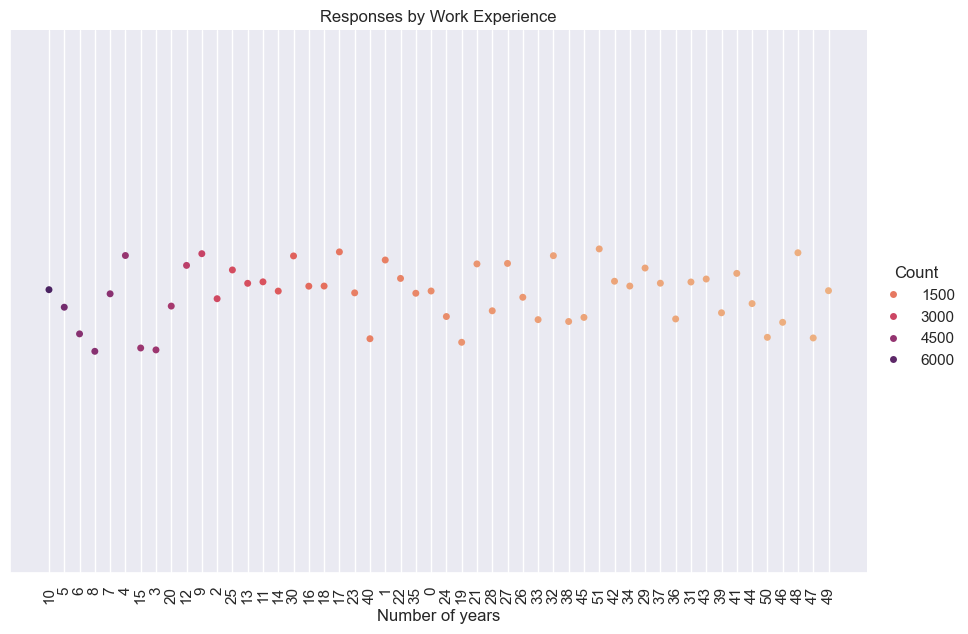

In [335]:
sns.catplot(ax=ax,data=year_df, x='Years',hue='Count', palette='flare',height=6.27, aspect=11.7/8.27).set(xlabel='Number of years', ylabel='', title='Responses by Work Experience').set_xticklabels(rotation=90); 

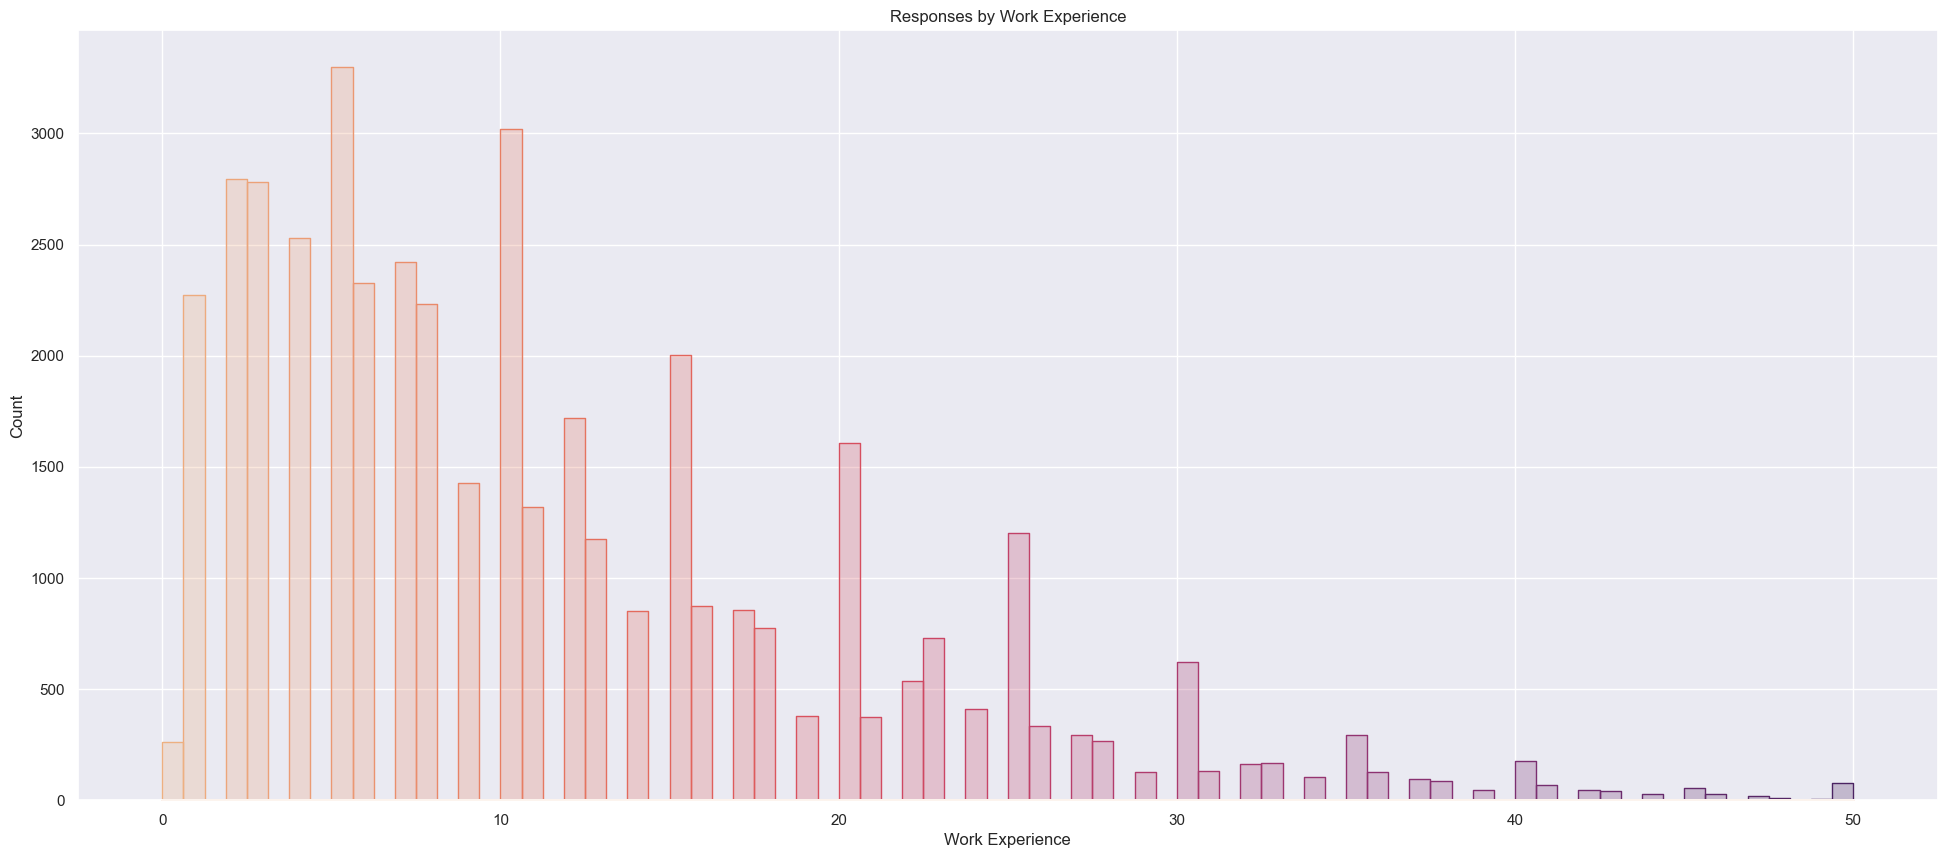

In [336]:
sns.histplot(data=df, x="WorkExp",hue='WorkExp',palette='flare',legend=None,element="step").set(xlabel='Work Experience', ylabel='Count', title='Responses by Work Experience');

#### Percentage of Respondents with less than a decade of experience

In [337]:
#Convert the years column to numeric
year_df.Years = pd.to_numeric(year_df.Years, errors='coerce')
#Sort the valuesa and get the first 10 years
ten_years = year_df.sort_values(by=['Years'])[0:11]
ten_year_count = ten_years['Count'].sum() 
decade_exp_percentage = round(ten_year_count/data.shape[0]*100,2)
decade_exp_percentage

49.71

Most respondents are in the early to mid-career stage. **49.71%** of respondents have less than a decade of coding experience


#### Technologies and Programming Languages Analysis with these columns
'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith', 'AIToolCurrently Using'

<strong>Most used Programming Language</strong>

In [326]:
# Function to split the individual values from a  multi value column
def split_multi_value_column(df,column):
    str_list = []
    for i in df[column]:
       if pd.isnull(i):
          continue
       data = i.split(";")
       for j in data:
          str_list.append(j)
    return str_list

In [327]:
def technology_plotting(tech_name):
    nan_counts = df[tech_name].isna().sum()
    # filtering the rows without Nan values
    tech_initial_data = df[~df[tech_name].isna()]
    tech_initial_data[tech_name].value_counts()
    #Splitting the multi value column 
    tech_list = split_multi_value_column(tech_initial_data,tech_name)
    # Using value_counts() to return all element occurrences
    #pd.Series(tech_list).value_counts().head(10)
    tech_df = pd.DataFrame(tech_list, columns=[tech_name])
    tech_data = tech_df[tech_name].value_counts().head(5)
    keys = tech_data.keys()
    values = tech_data.values
    colors = ("tab:orange","salmon", "crimson", "brown","maroon")
    # Create a bar chart
    fig, ax = plt.subplots()
    # plt.pie(values, labels=keys,colors=colors)
    bars = plt.bar(keys,values, color = colors);
    plt.title(tech_name)
    # plt.xticks(rotation=90, ha='right')
    
    # Calculate total to get percentages
    total = 87981 - nan_counts #Total number of respondants


    # Annotate with percentage
    for bar in bars:
        height = bar.get_height()
        percentage = (100 * height) / total
        ax.text(bar.get_x() + bar.get_width() / 2, height,
                f'{percentage:.1f}%', ha='center', va='bottom')
    
    plt.show()

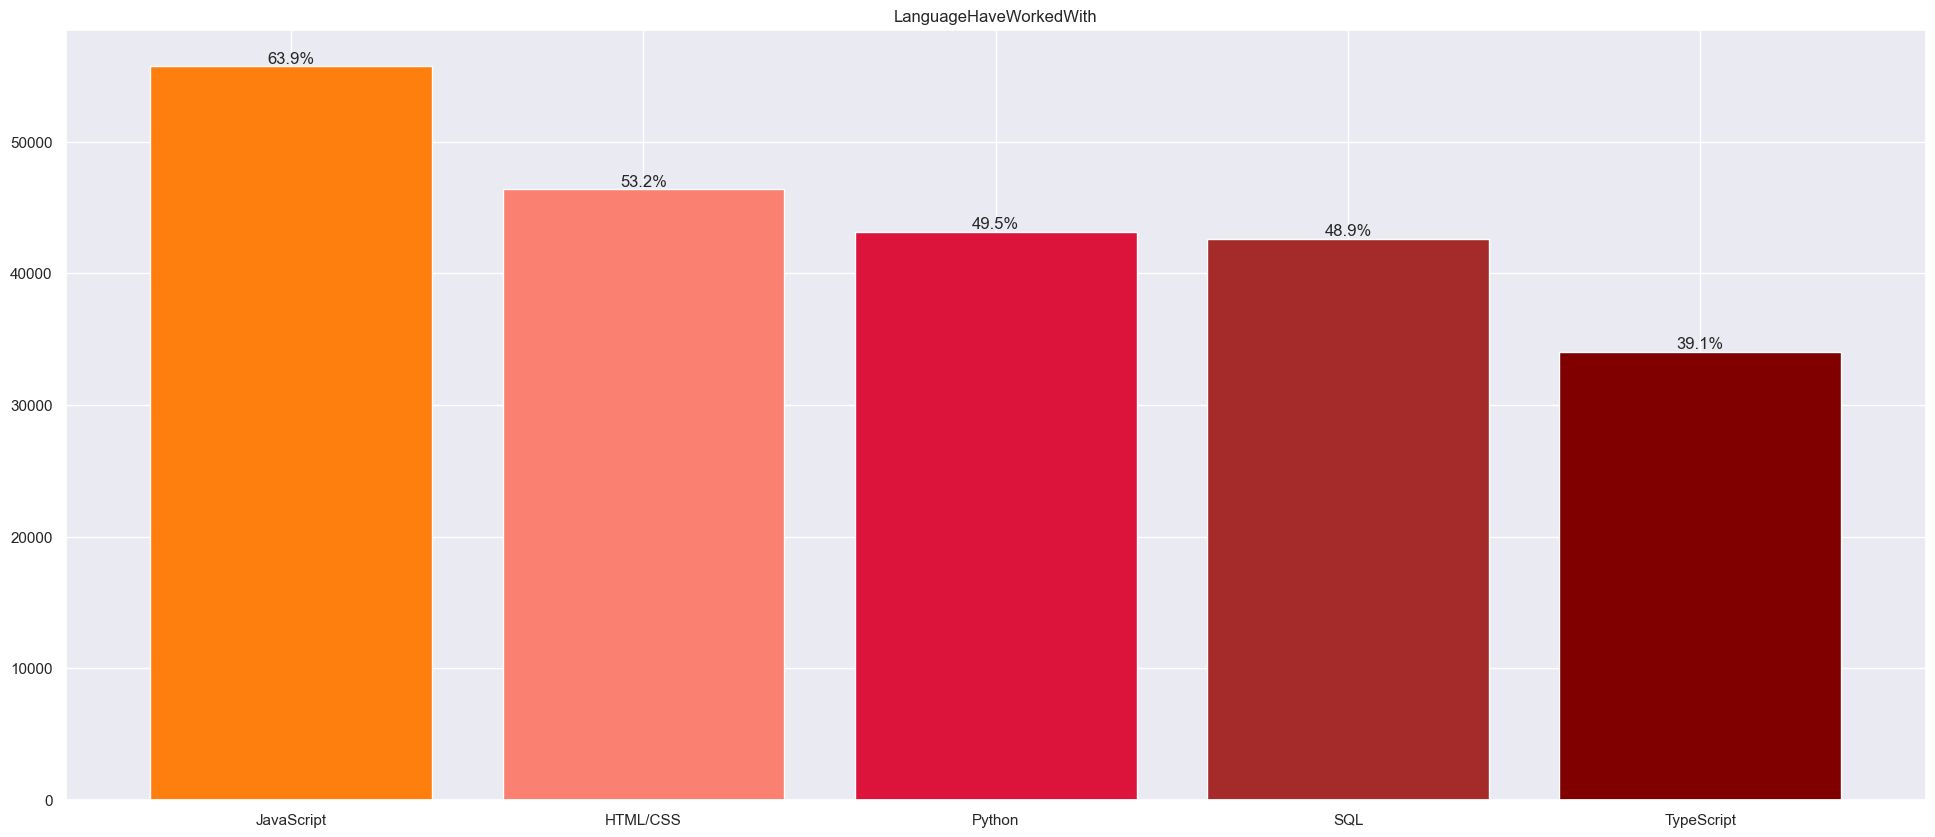

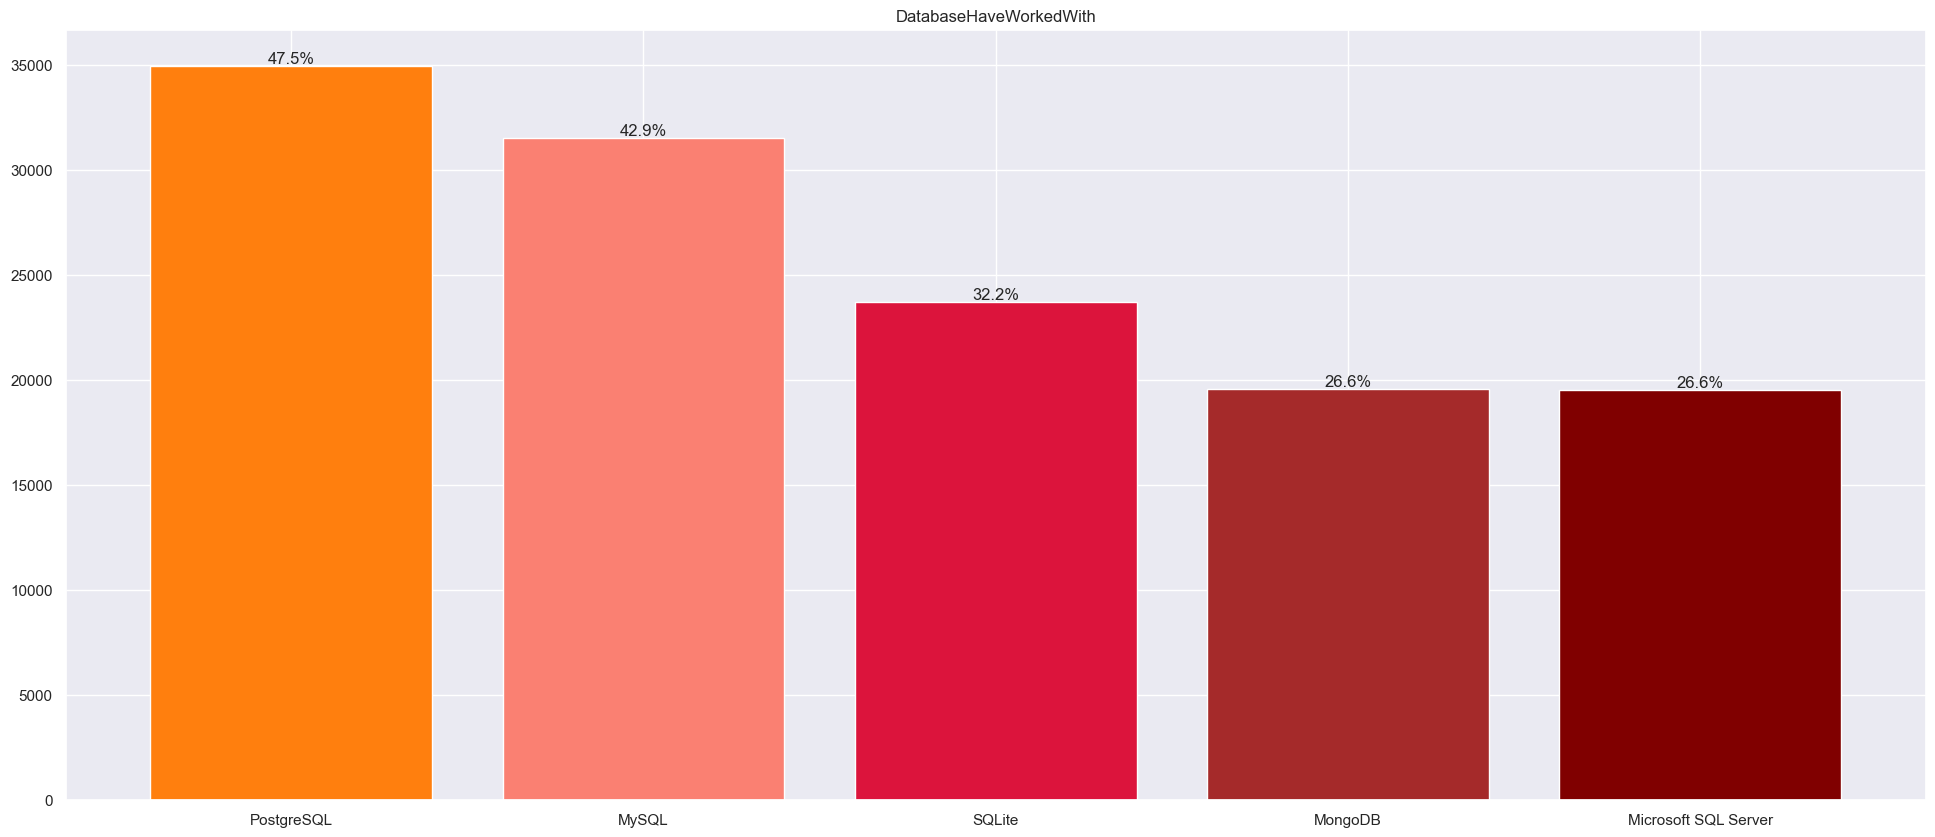

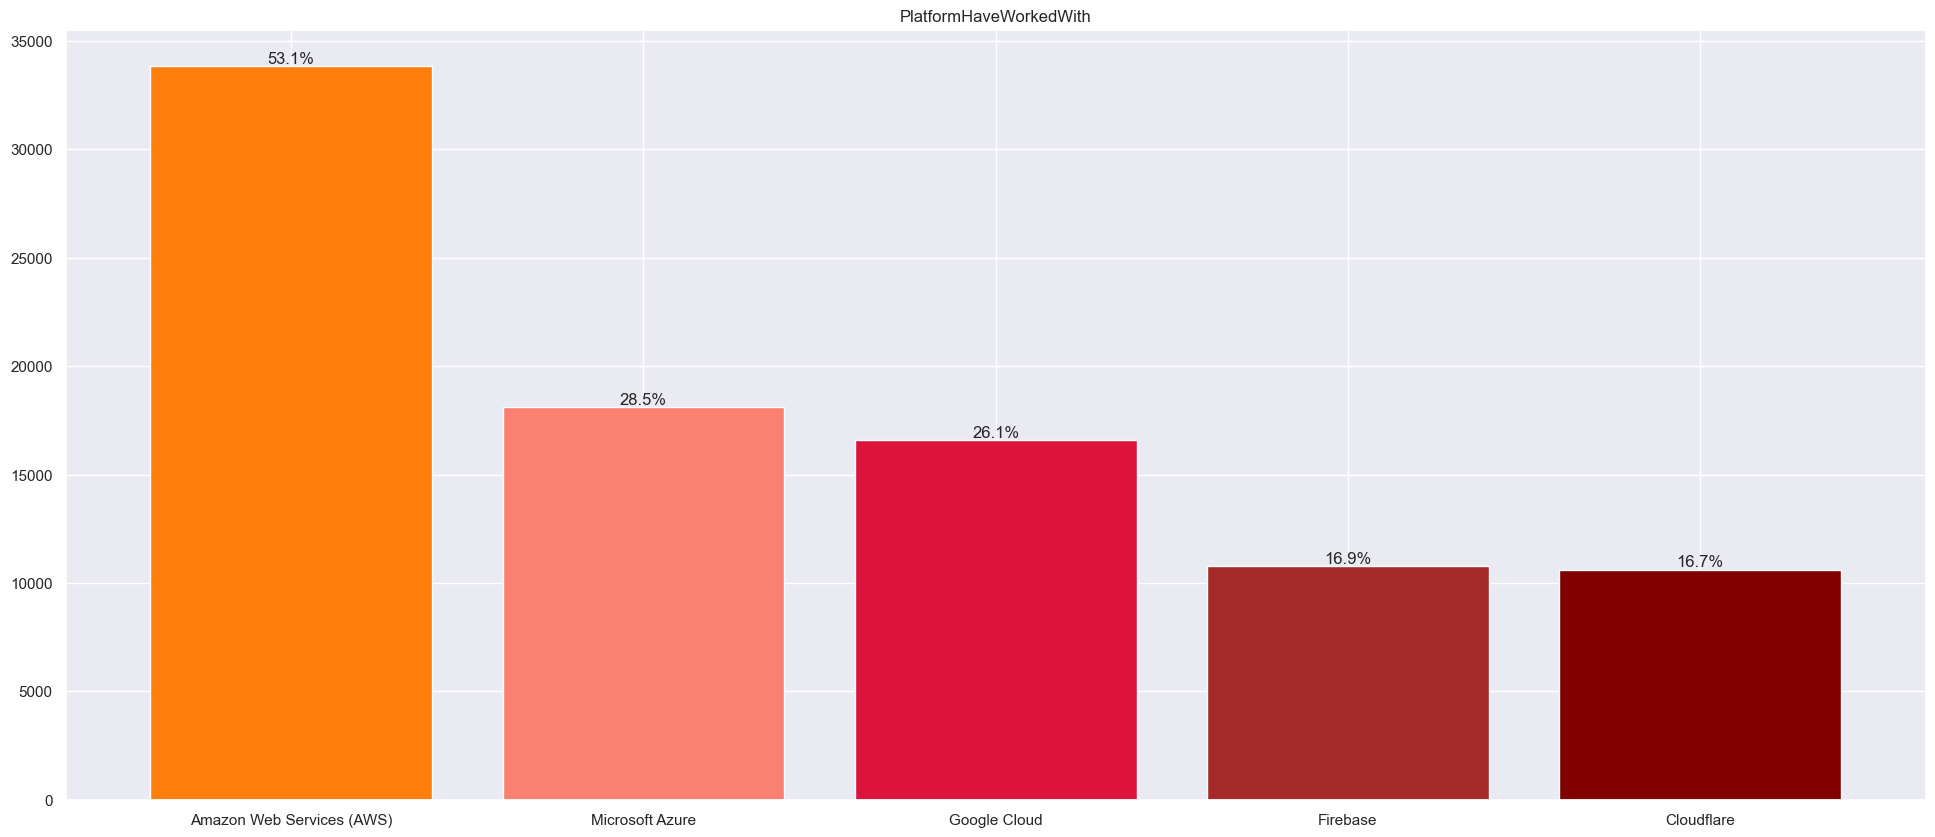

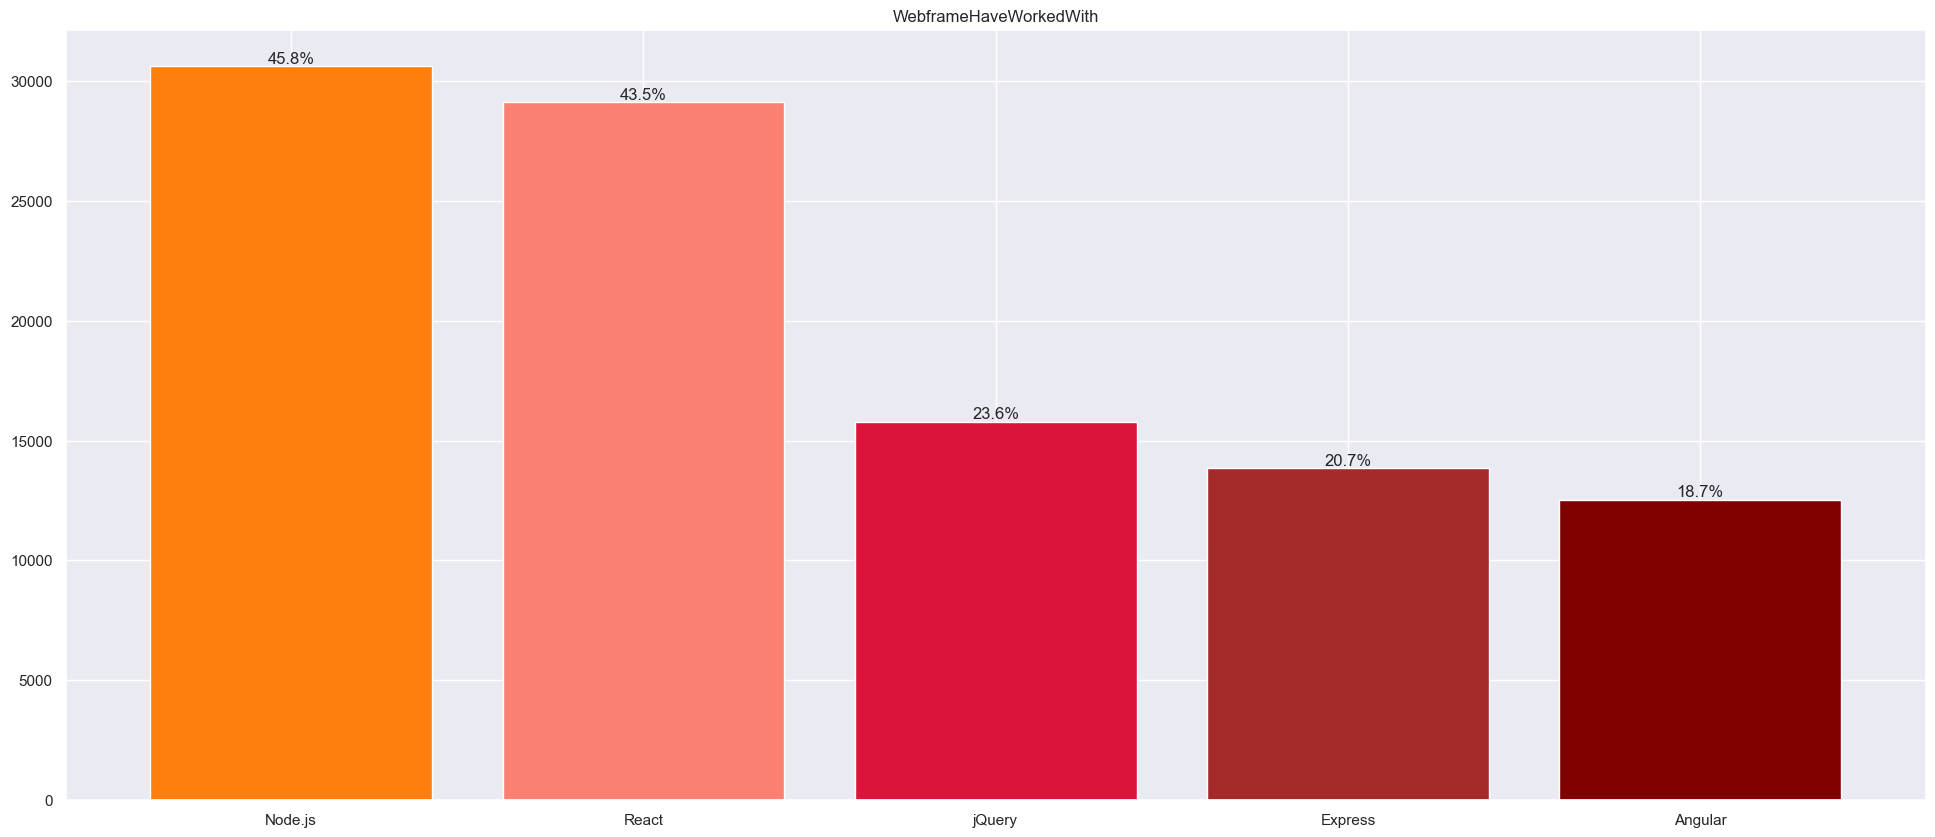

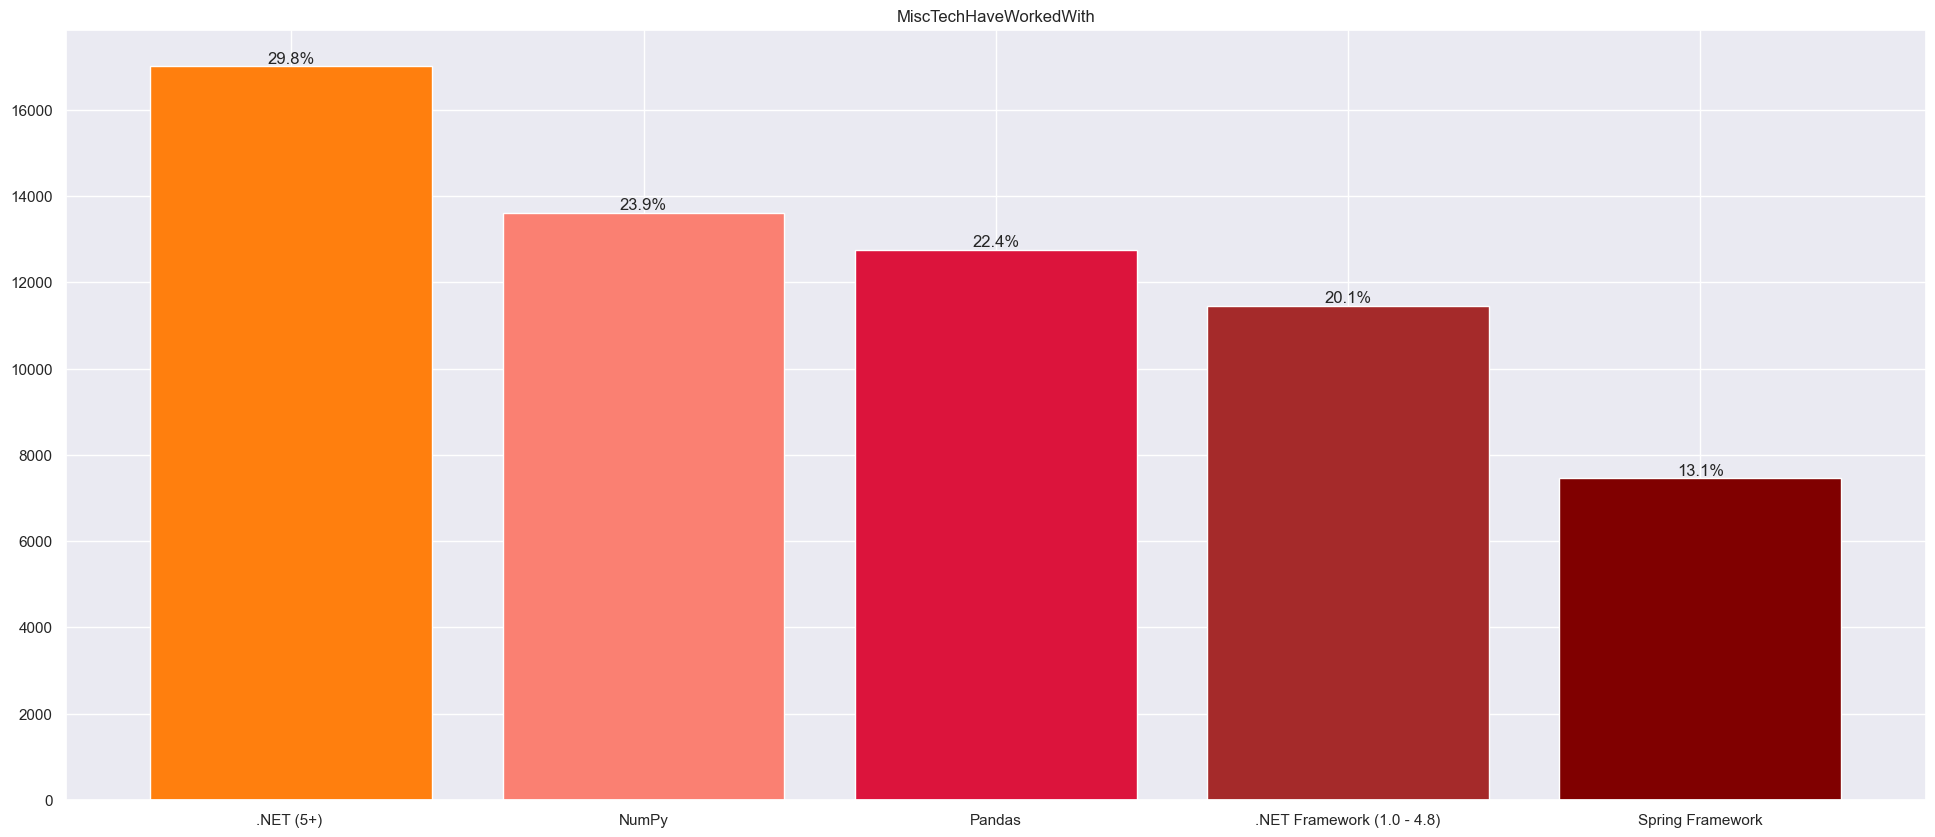

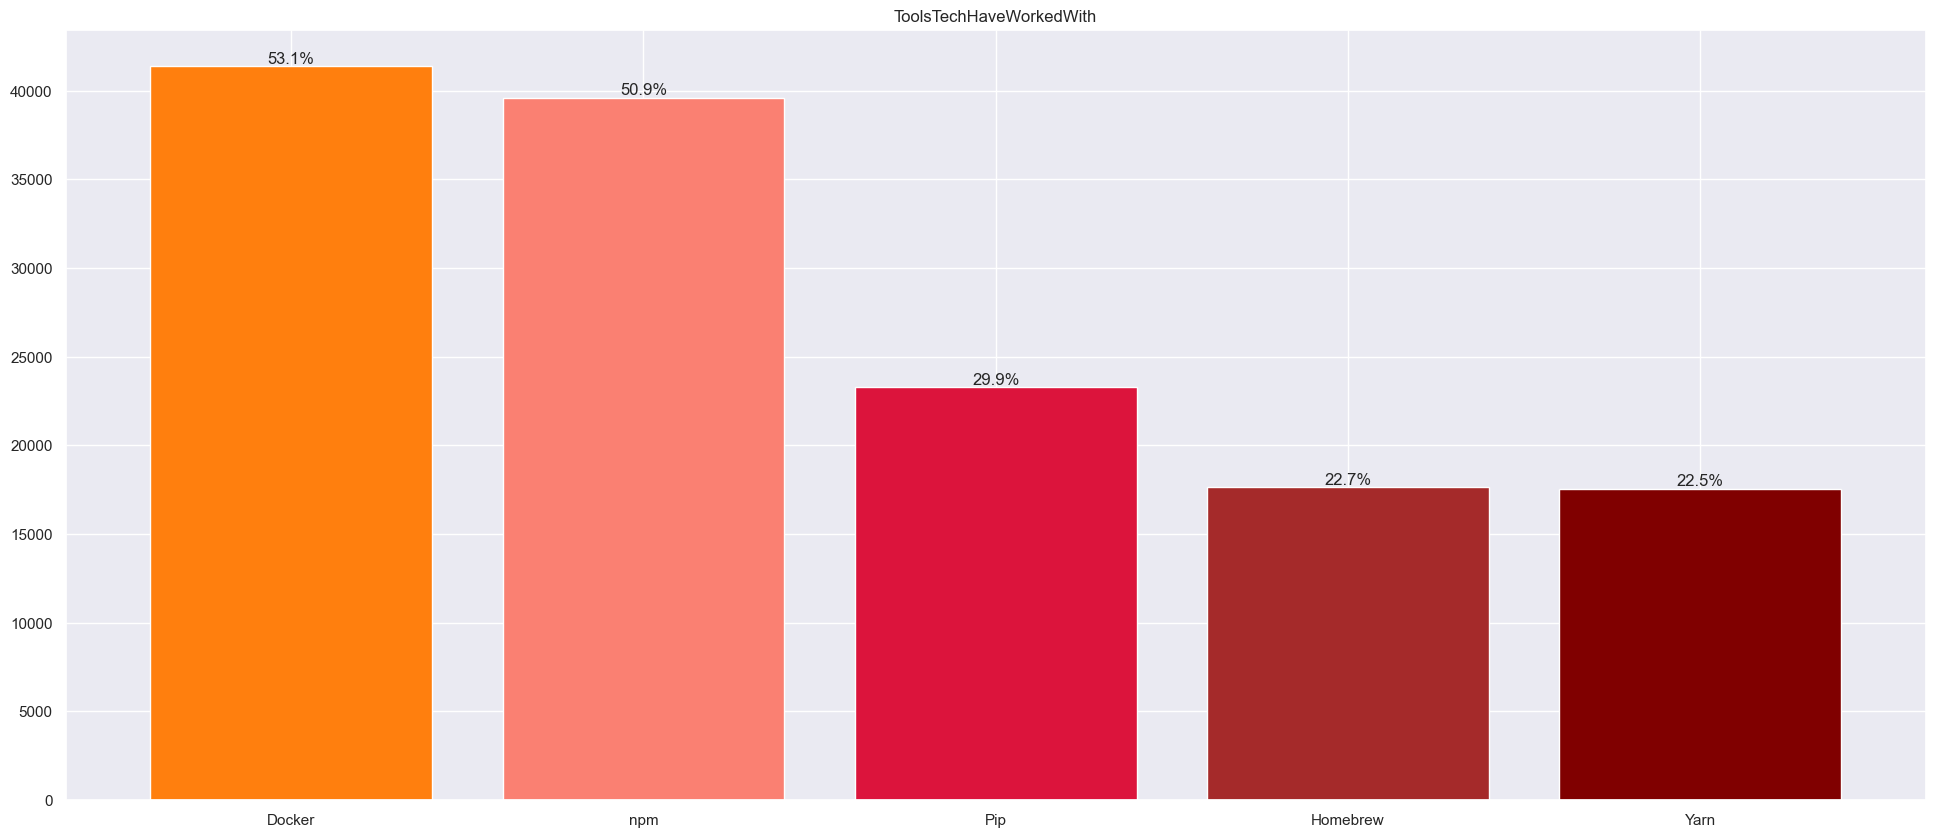

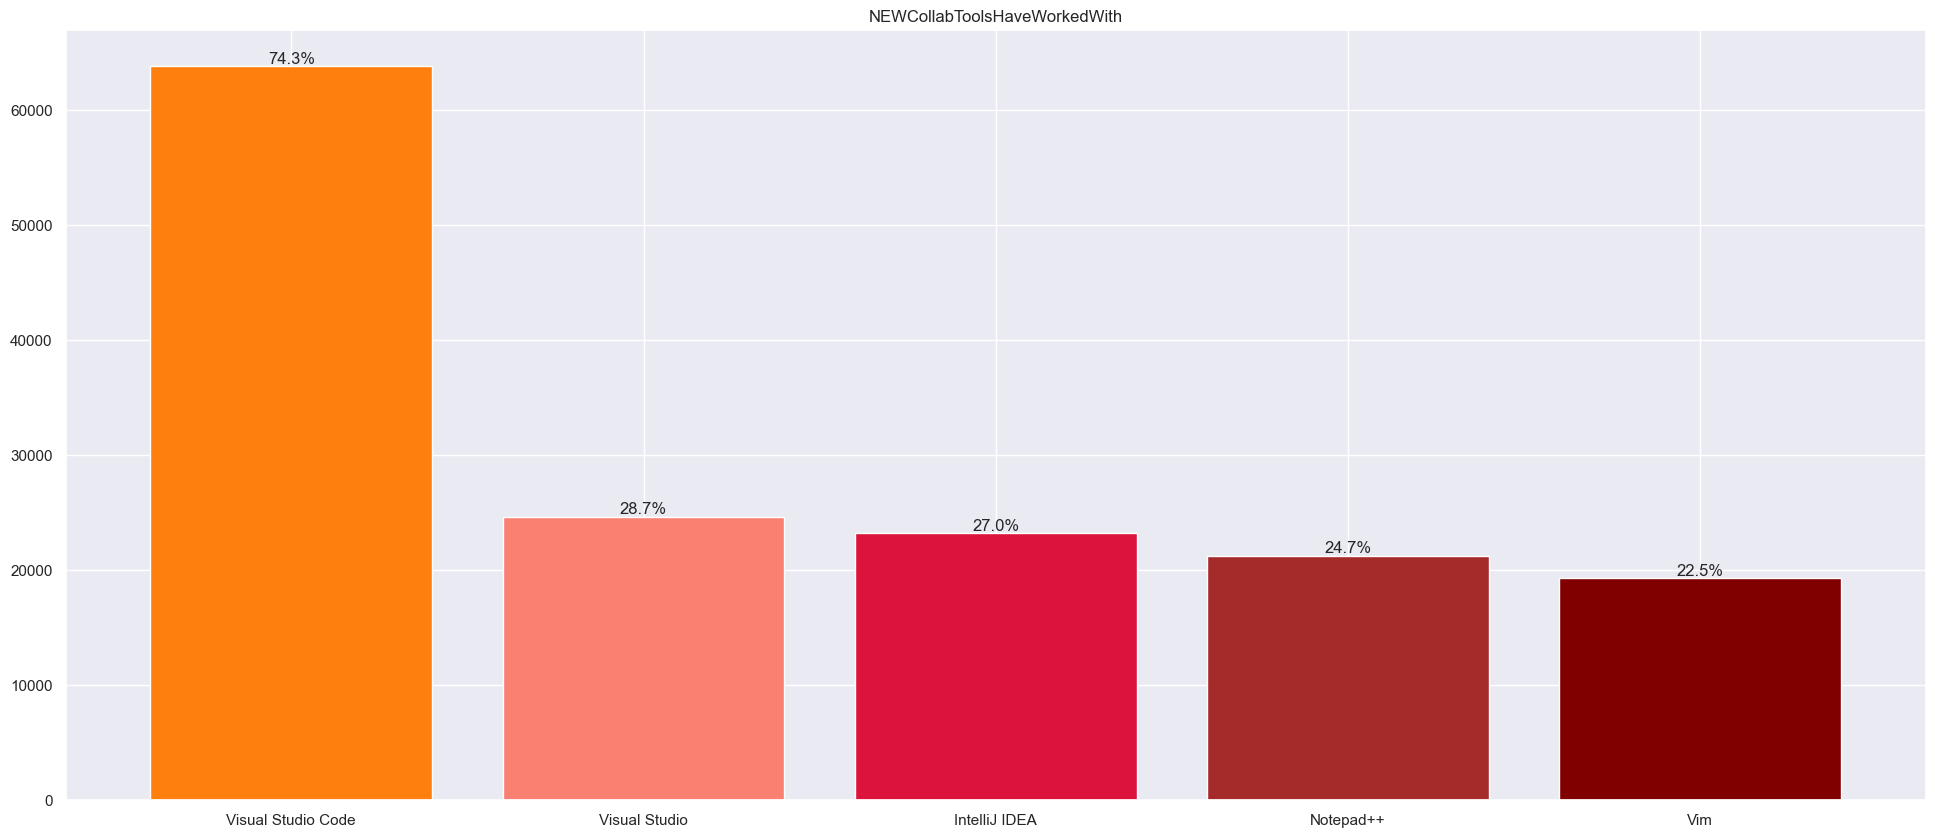

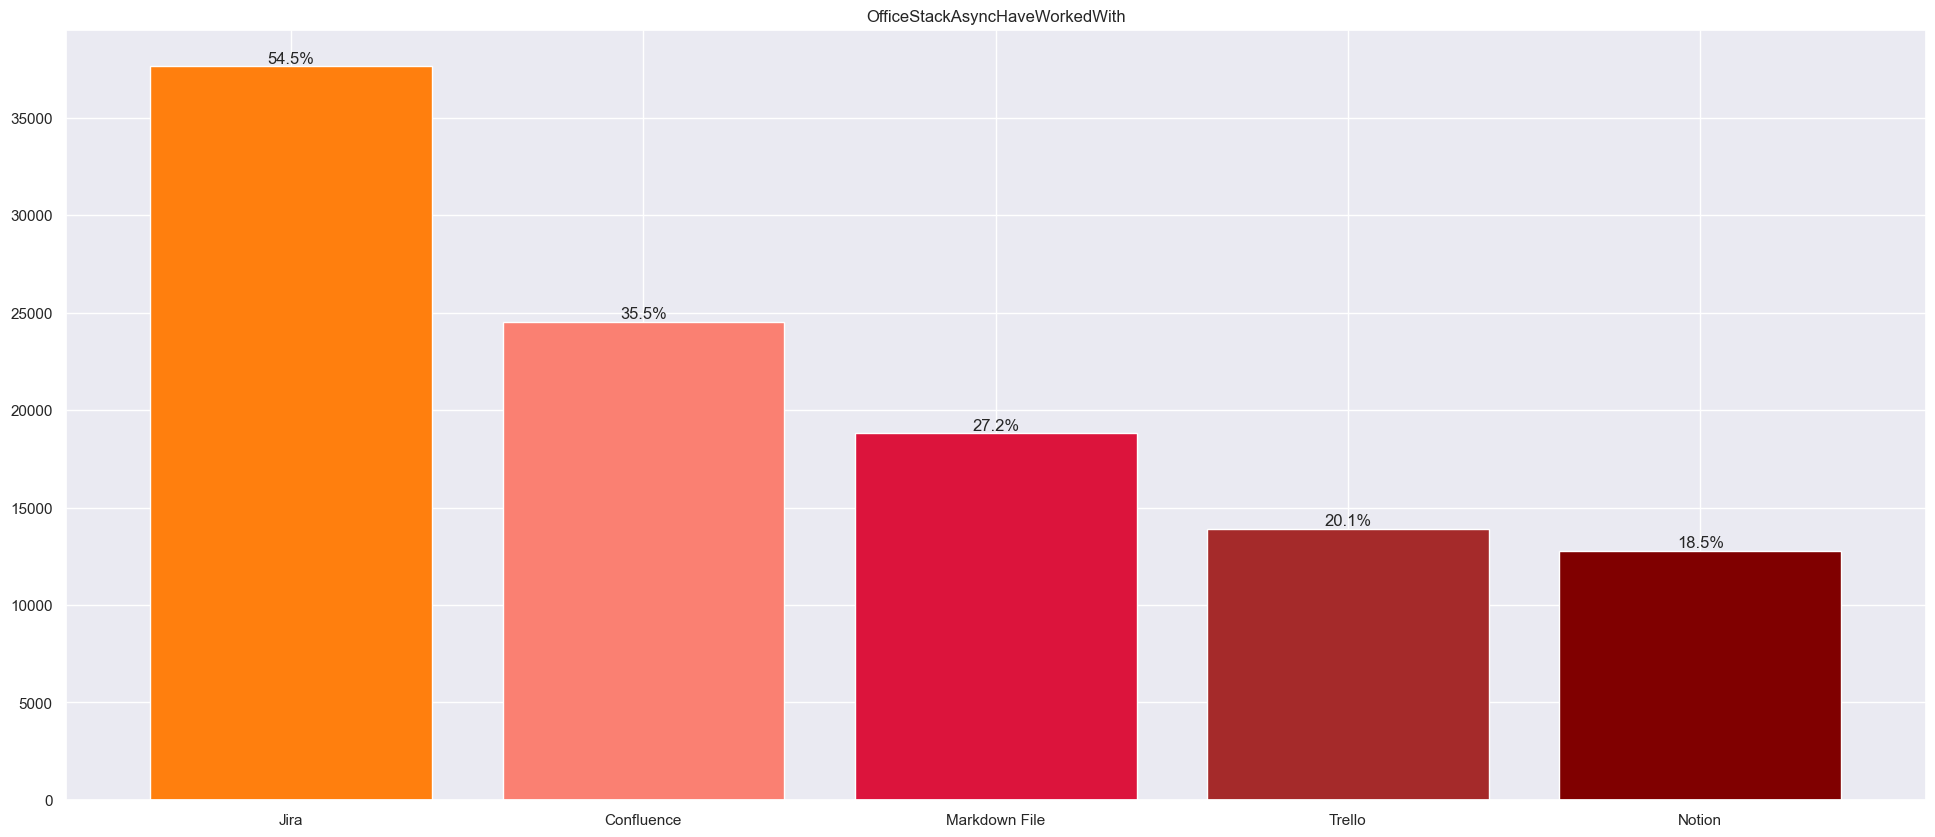

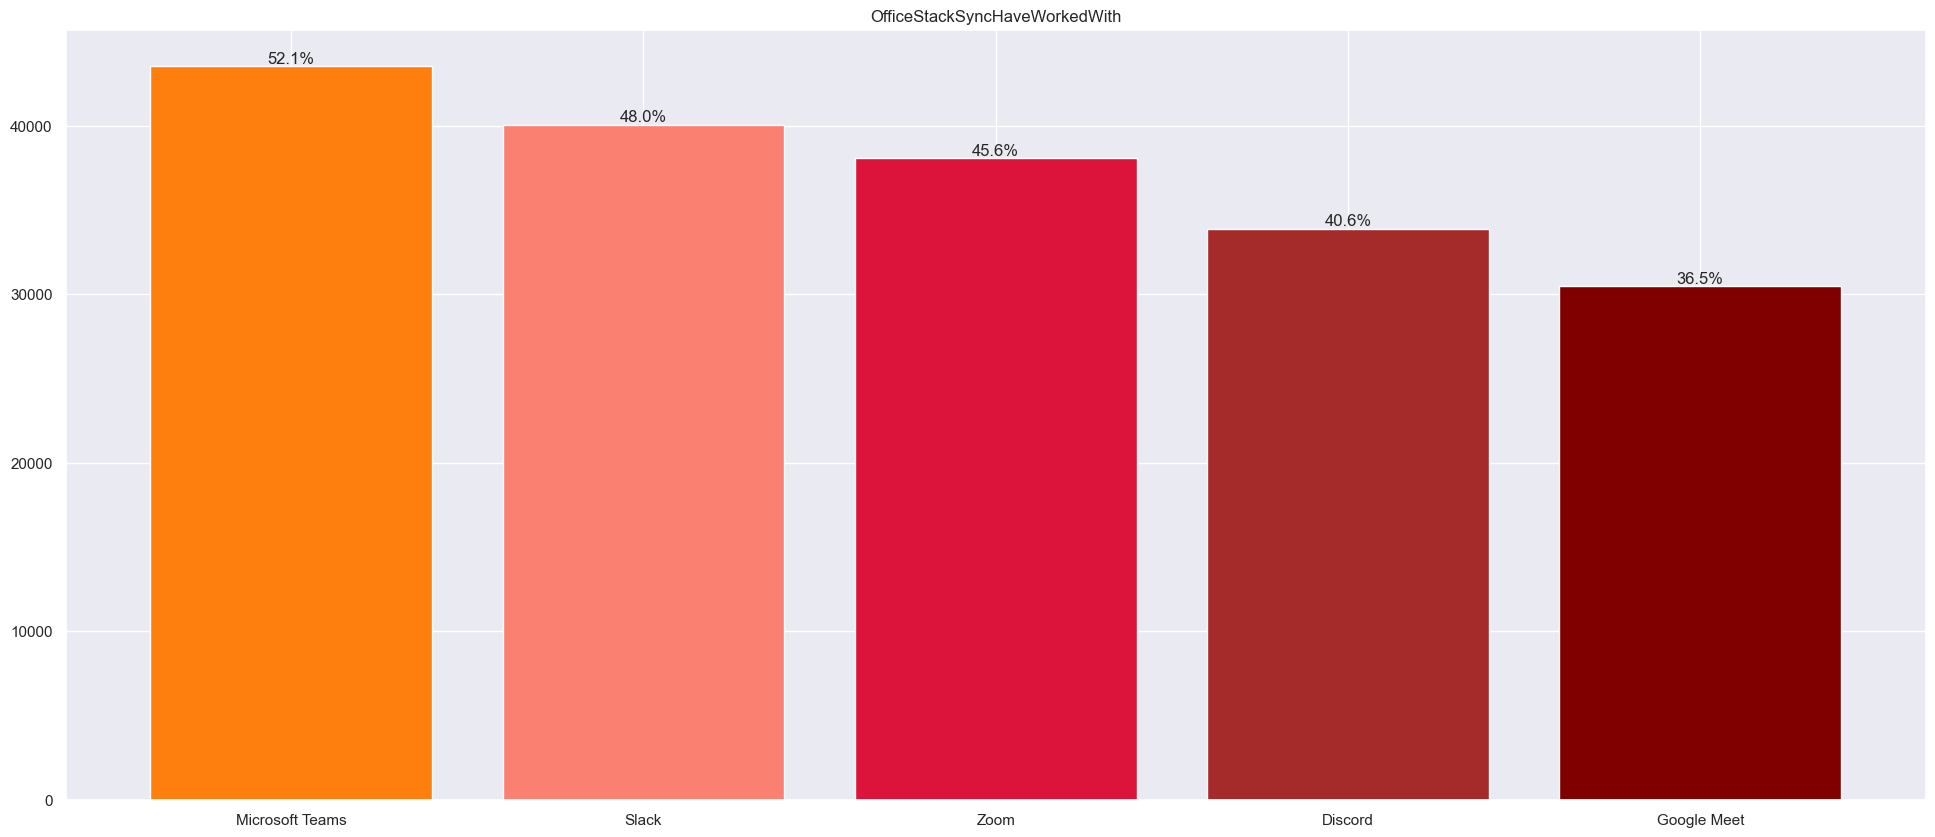

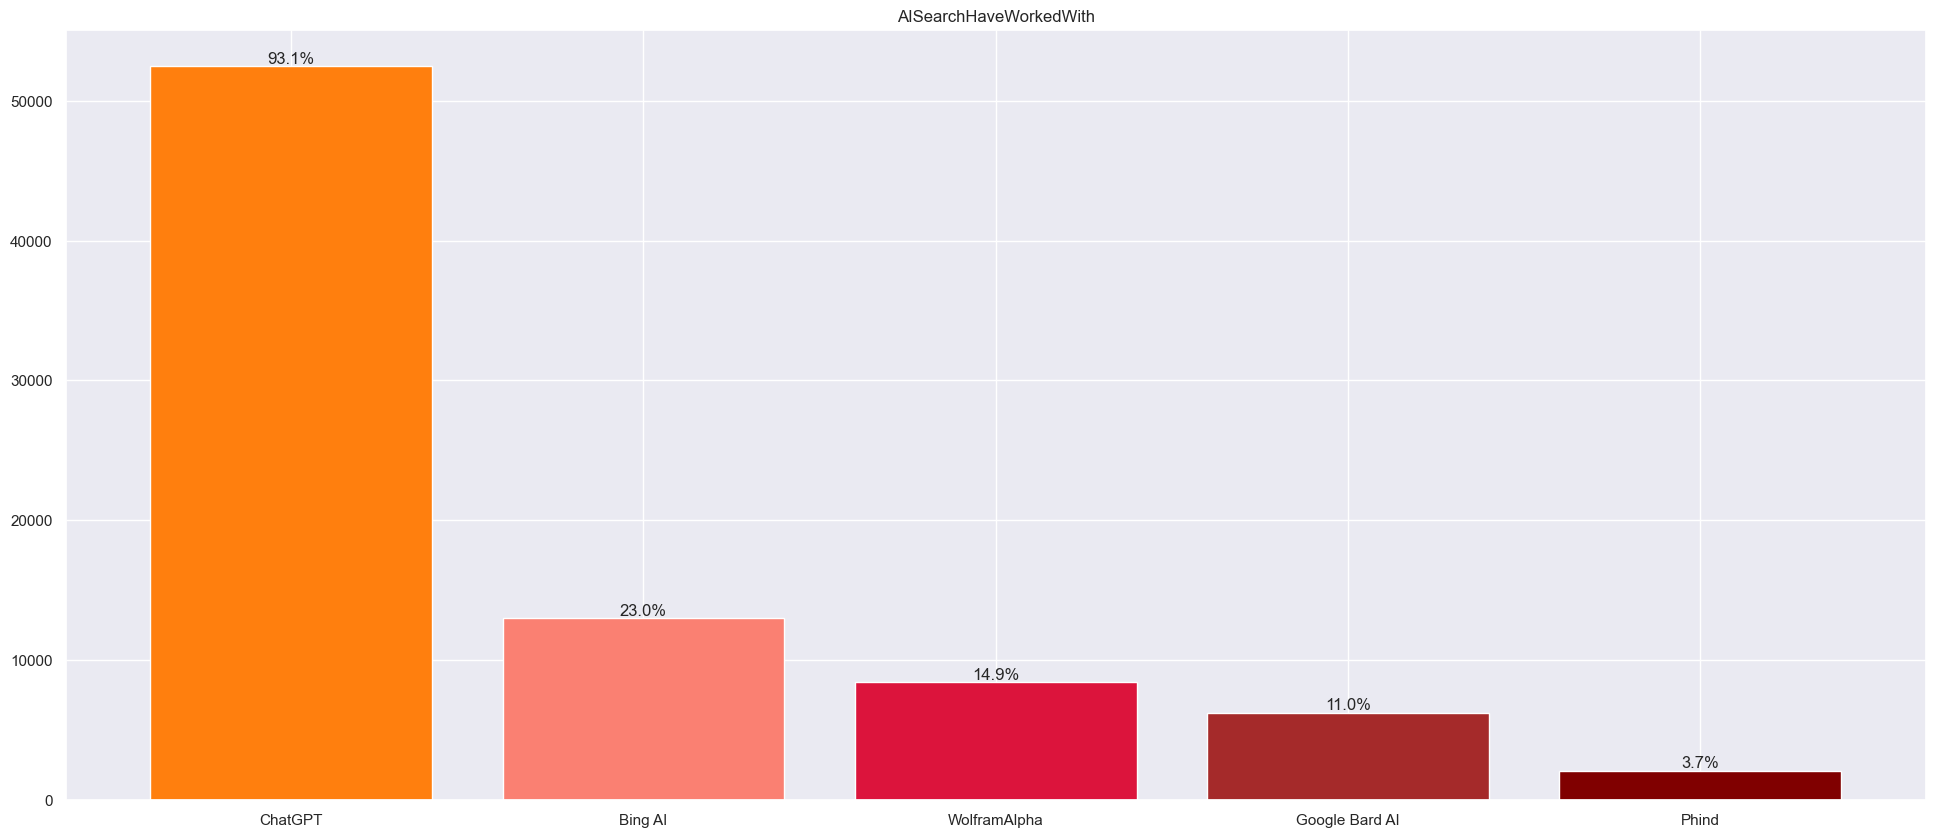

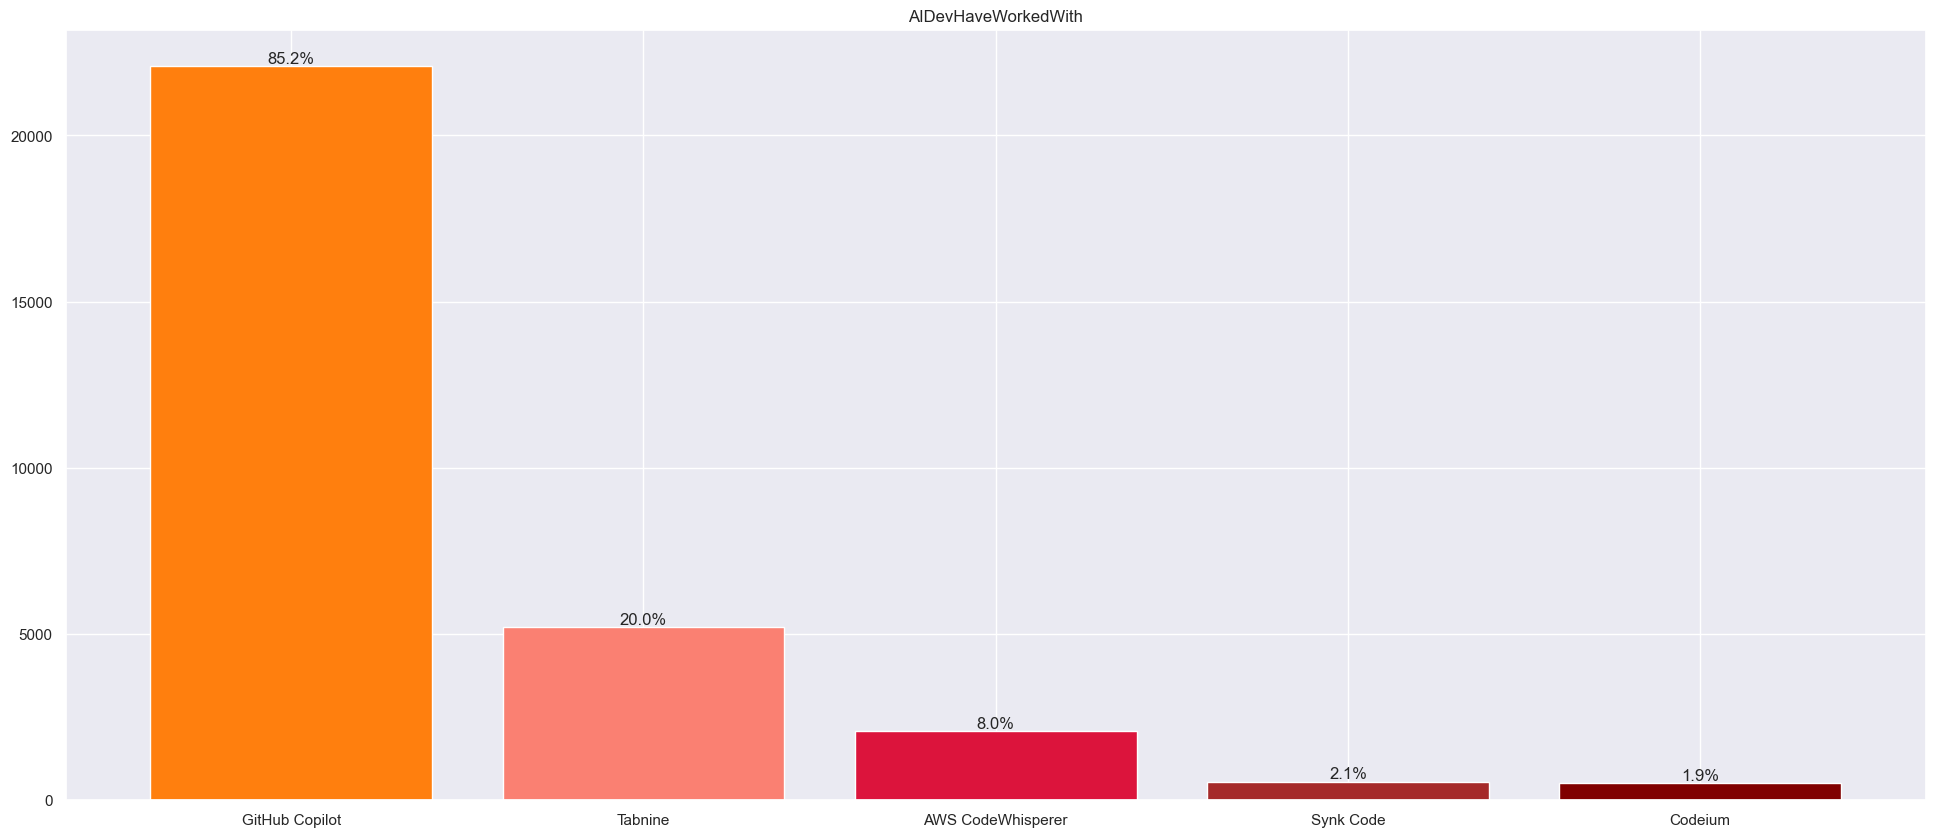

In [328]:
technology_list = ['LanguageHaveWorkedWith','DatabaseHaveWorkedWith','PlatformHaveWorkedWith','WebframeHaveWorkedWith','MiscTechHaveWorkedWith', \
                   'ToolsTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OfficeStackAsyncHaveWorkedWith', \
                   'OfficeStackSyncHaveWorkedWith','AISearchHaveWorkedWith', 'AIDevHaveWorkedWith']
for technology in technology_list:
    technology_plotting(technology)

 - Languages that are popular with students: JavaScript, HTML/CSS, Python
 - Database: Professional developers are inclined to use PostgreSQL more frequently than those who are learning to code, whereas learners are more inclined to use MySQL.
 - Web frameworks: Node.js and React.js are the two most common web technologies used by all respondents
 - Cloud Platforms: Among all respondents, AWS continues to be the most utilized cloud platform, comfortably securing the leading position, with its usage nearly doubling that of the second most used cloud platform, Azure.
 - Other tools: Docker is the top-used other tool amongst all respondents followed by npm and pip
 - Other frameworks:.NET (5+) is top of the list. Those learning to code are using NumPy and Pandas more than .NET (5+)
 - Collaboration Tools: Visual Studio Code remains the preferred IDE across all developers
 - Synchronous Tools: The top three synchronous tools, Microsoft Teams, Slack, and Zoom, are universally favoured by all respondents

### Detailed Data Analysis

#### Which Developers paid the most?

In [338]:
# Filtering the  valid salary inputs and removing the outliers
df_salary = df[(df['ConvertedCompYearly'] < 200000) & (df['ConvertedCompYearly'] > 20000)]
# Created a new dataframe with DevType and ConvertedCompYearly to get the developer and salary analysis 
df_salary_dev = df_salary[['DevType','ConvertedCompYearly']].groupby(by=['DevType'])['ConvertedCompYearly'].mean().to_frame().reset_index()
df_salary_dev = df_salary_dev.sort_values('ConvertedCompYearly',ascending=False)
df_salary_dev

,DevType,ConvertedCompYearly
21,Engineering manager,111310.110676
20,"Engineer, site reliability",106992.543210
30,"Senior Executive (C-Suite, VP, etc.)",104675.003752
8,Developer Advocate,100014.303371
2,Cloud infrastructure engineer,99730.467446
9,Developer Experience,97859.907285
1,Blockchain,97178.262774
23,Marketing or sales professional,97118.387097
28,Scientist,94939.361446
29,Security professional,94685.163842


In [339]:
def split_column_value(df,col1,col2):
    n = 0
    str_list = []
    salary_list = []
    for i in df[col1]:
        val = df.iloc[n,1]
        n=n+1
        if pd.isnull(i):
            continue
        data = i.split(";")
        for j in data:
           str_list.append(j)
           salary_list.append(val)
    newdf = pd.DataFrame({col1:str_list, col2:salary_list})
    return newdf

In [340]:
newdf = split_column_value(df_salary_dev,'DevType','ConvertedCompYearly')
newdf.head()

,DevType,ConvertedCompYearly
0,Engineering manager,111310.110676
1,"Engineer, site reliability",106992.543210
2,"Senior Executive (C-Suite, VP, etc.)",104675.003752
3,Developer Advocate,100014.303371
4,Cloud infrastructure engineer,99730.467446


In [341]:
df_group =  newdf[['DevType','ConvertedCompYearly']].groupby(by=['DevType'])['ConvertedCompYearly'].mean().to_frame().reset_index()
keys = df_group['DevType']
data = df_group['ConvertedCompYearly']

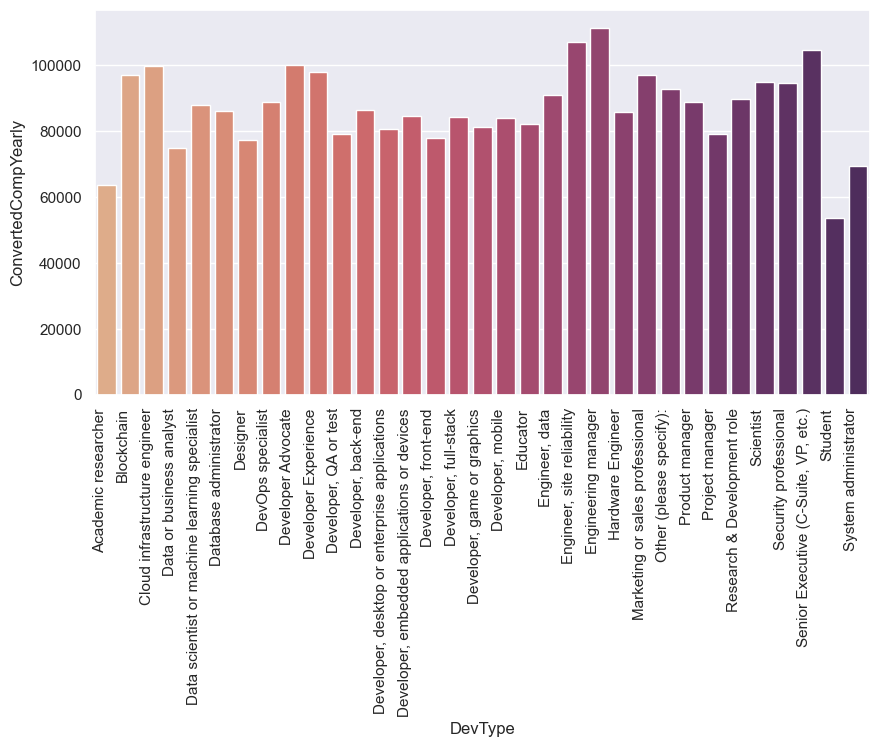

In [342]:
fig = plt.figure(figsize = (10, 5))
plt.xticks(rotation = 90, ha = 'right')
# plt.bar(keys, data, color ='tab:orange');
sns.barplot(x='DevType', y='ConvertedCompYearly', data=df_group, palette='flare');

Senior roles like c-suite executives and engineering managers tend to have the highest salaries.

#### Highest Level of Education completed by Data Professional

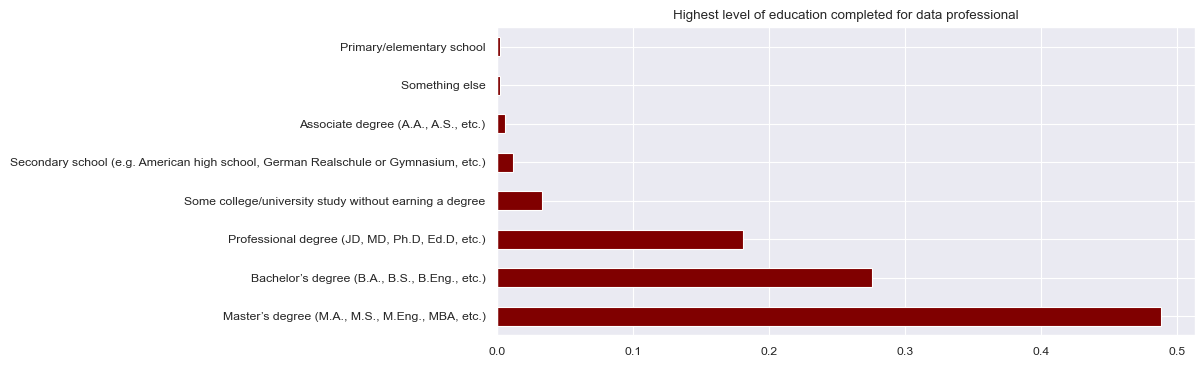

In [170]:
df.loc[df['DevType']=='Data scientist or machine learning specialist','EdLevel'].value_counts(normalize=True).plot(kind="barh", title="Highest level of education completed for data professional", ylabel='',color='maroon');

Majority of respondents had Bachelor's degree (>40%). However, among data specialists Master's degree was more prevalent, and almost a half of data scientists or machine learning specialists had it.

#### Work Type

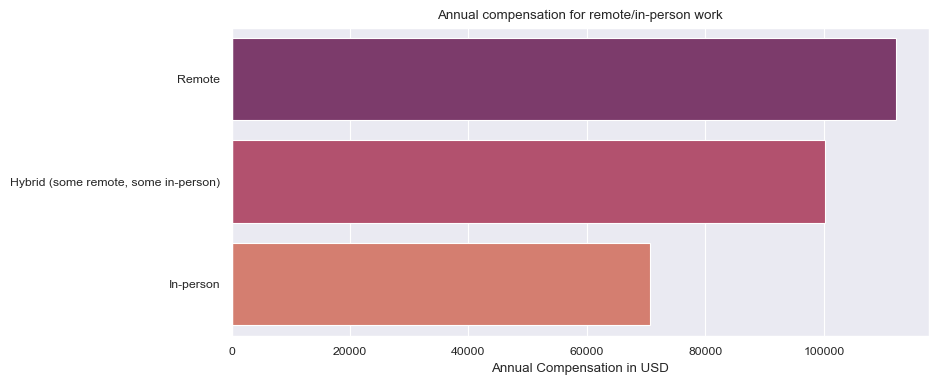

In [118]:
sns.barplot(df, y='RemoteWork', 
            x='ConvertedCompYearly',
            palette='flare_r',errorbar=None).set(ylabel = '', 
                                         xlabel = 'Annual Compensation in USD', 
                                         title = 'Annual compensation for remote/in-person work');

We see that majority of people work remotely or in hybrid arrangements, while in-person workers also get less annual pay.

#### Compensation across different Country 

Text(0.5, 1.0, 'Median annual compensation by country')

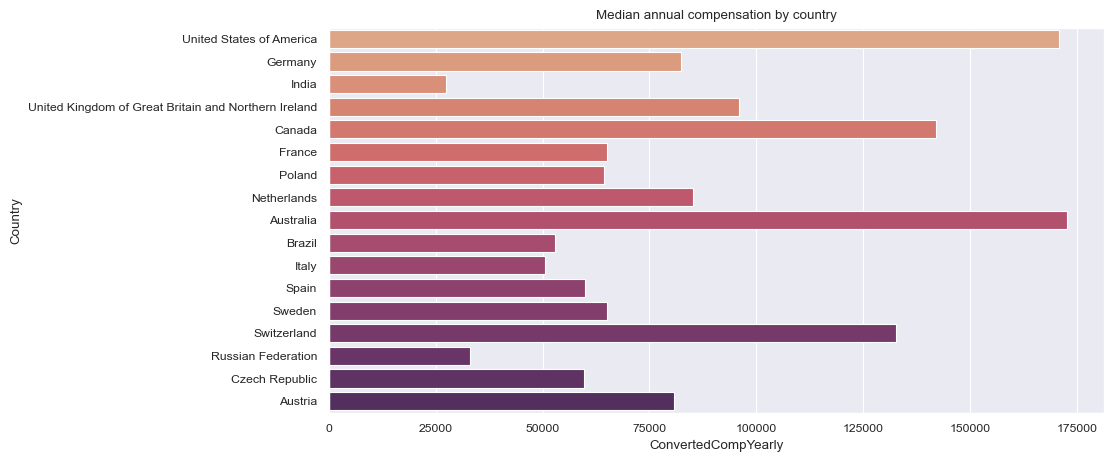

In [119]:
fig = plt.figure(figsize = (10, 5))
sns.barplot(df, y="Country", x="ConvertedCompYearly", order=df.Country.value_counts().iloc[:17].index,errorbar=None,palette='flare');
plt.xlabel=('Annual Compensation in USD')
plt.title('Median annual compensation by country')                                                               

Respondents from US earns more followed by Australia and Canada


#### Annual compensation for job role in UK

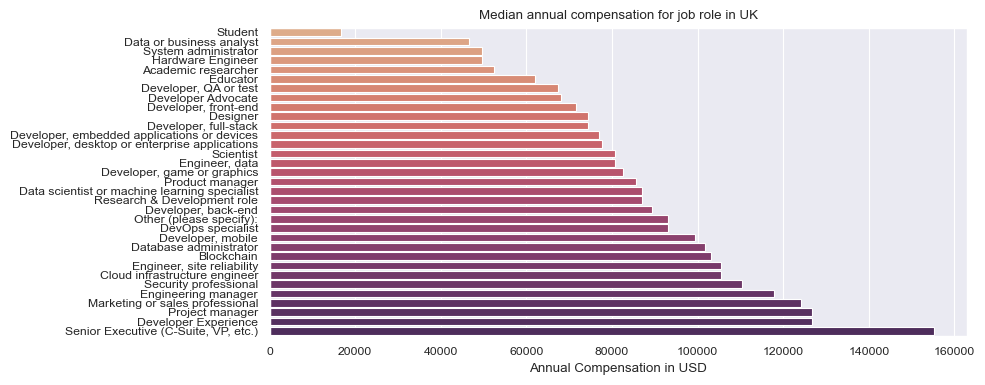

In [120]:
result = df[df.Country == "United Kingdom of Great Britain and Northern Ireland"].groupby(["DevType"])['ConvertedCompYearly'].aggregate(np.median).reset_index().sort_values('ConvertedCompYearly')
sns.barplot(df[df.Country == "United Kingdom of Great Britain and Northern Ireland"], 
            y='DevType', 
            x='ConvertedCompYearly', 
            estimator='median', 
            order=result['DevType'],
            errorbar=None,
           palette='flare').set(ylabel = '', xlabel = 'Annual Compensation in USD', title = 'Median annual compensation for job role in UK');

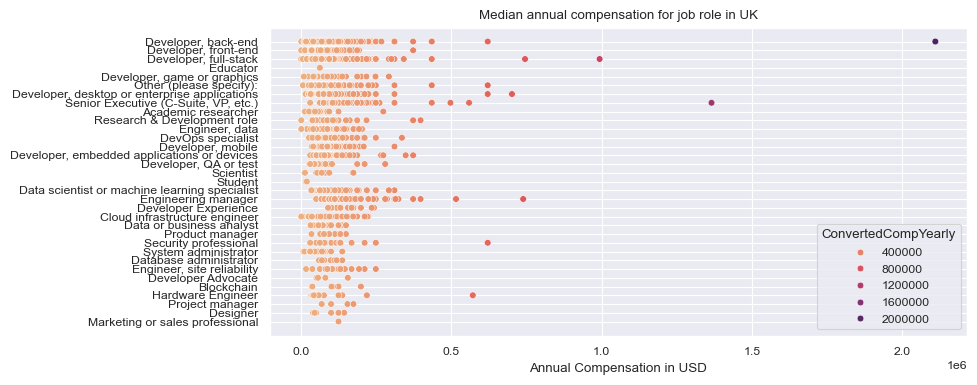

In [127]:
result = df[df.Country == "United Kingdom of Great Britain and Northern Ireland"].groupby(["DevType"])['ConvertedCompYearly'].aggregate(np.median).reset_index().sort_values('ConvertedCompYearly')
sns.scatterplot(df[df.Country == "United Kingdom of Great Britain and Northern Ireland"], 
            y='DevType', 
            x='ConvertedCompYearly',
            hue='ConvertedCompYearly',
           palette='flare').set(ylabel = '', xlabel = 'Annual Compensation in USD', title = 'Median annual compensation for job role in UK');

- Just like across the globe, senior roles have highest salaries.- 
Data analyst roles have average salary of 45
- 
Full stack web developers have average salary of 75K 


#### Education Level and Compensation

In [151]:
df['EdLevel'].unique()

array([nan, 'Bachelor’s degree ',
       'Some college/university study without earning a degree',
       'Master’s degree ', 'Primary/elementary school',
       'Professional degree ', 'Associate degree ', 'Secondary school ',
       'Something else'], dtype=object)

In [152]:
df['EdLevel'] = df['EdLevel'].str.split('(').str[0]
df['EdLevel'].unique()

array([nan, 'Bachelor’s degree ',
       'Some college/university study without earning a degree',
       'Master’s degree ', 'Primary/elementary school',
       'Professional degree ', 'Associate degree ', 'Secondary school ',
       'Something else'], dtype=object)

In [153]:
df.head()

,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,Bachelor’s degree,Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
3,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,Bachelor’s degree,Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
4,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,Bachelor’s degree,Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,12,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
5,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,Bachelor’s degree,Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [154]:
EdLevel_group = df.groupby('EdLevel')
avg_compensation = EdLevel_group['CompTotal'].median()
avg_compensation

EdLevel
Associate degree                                          100000.0
Bachelor’s degree                                         130000.0
Master’s degree                                           100000.0
Primary/elementary school                                 110000.0
Professional degree                                       100000.0
Secondary school                                           75000.0
Some college/university study without earning a degree    100000.0
Something else                                             75000.0
Name: CompTotal, dtype: float64

In [155]:
Edleveldf = pd.DataFrame({'EdLevel':avg_compensation.index, 'Compensation':avg_compensation.values})
Edleveldf

,EdLevel,Compensation
0,Associate degree,100000.0
1,Bachelor’s degree,130000.0
2,Master’s degree,100000.0
3,Primary/elementary school,110000.0
4,Professional degree,100000.0
5,Secondary school,75000.0
6,Some college/university study without earning ...,100000.0
7,Something else,75000.0


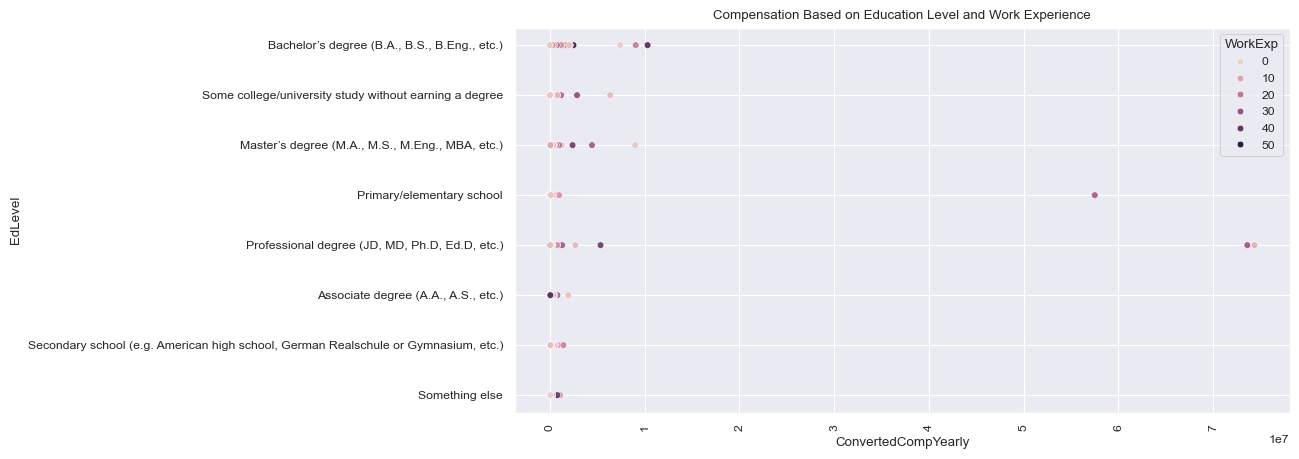

In [167]:
fig = plt.figure(figsize = (10,5))
sns.scatterplot(x='ConvertedCompYearly', y='EdLevel',hue='WorkExp',data=df, color='flare');
plt.title('Compensation Based on Education Level and Work Experience')
plt.xticks(rotation=90)
plt.show()

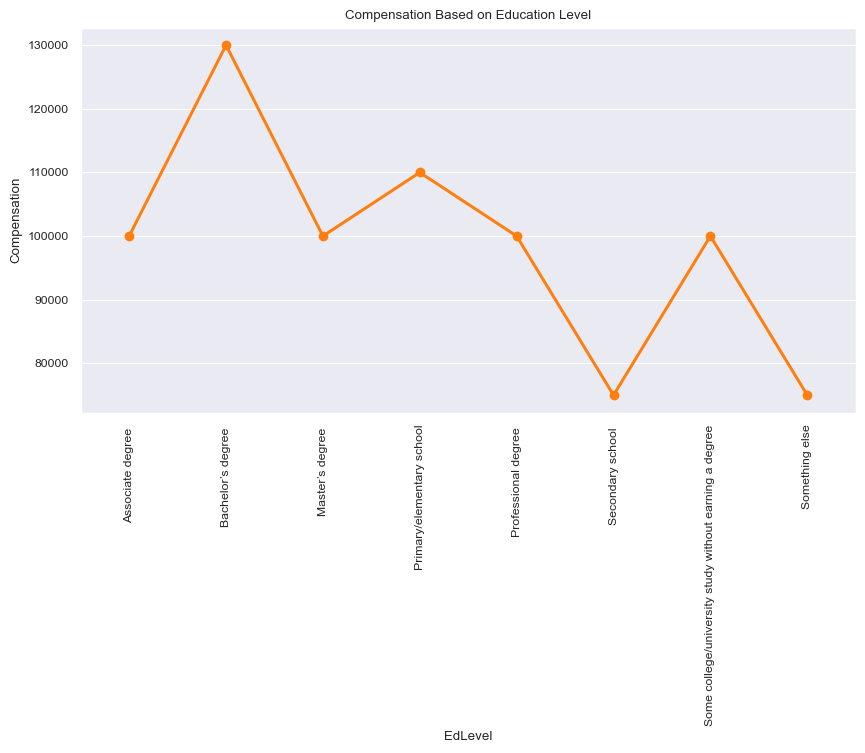

In [187]:
fig = plt.figure(figsize = (10,5))
sns.pointplot(x='EdLevel', y='Compensation',data=Edleveldf, color='tab:orange');
plt.title('Compensation Based on Education Level')
plt.xticks(rotation=90)
plt.show()

Respondents with Bachelor's degree and experience over 30 years tend to be paid more


#### Annual Compensation across Age group

Text(0.5, 1.0, 'Median annual compensation by country')

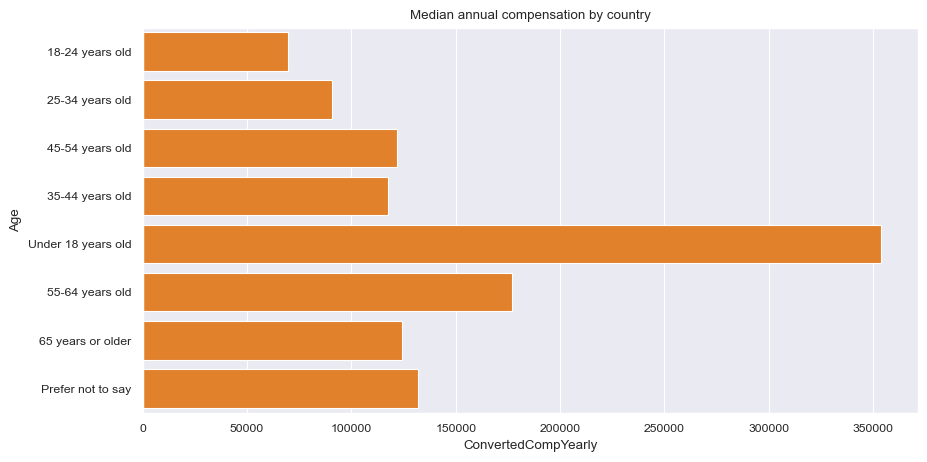

In [225]:
fig = plt.figure(figsize = (10, 5))
sns.barplot(df, y="Age", x="ConvertedCompYearly",errorbar=None,color='tab:orange');
plt.xlabel=('Annual Compensation in USD')
plt.title('Median annual compensation by country') 

#### Annual Compensation across Industry

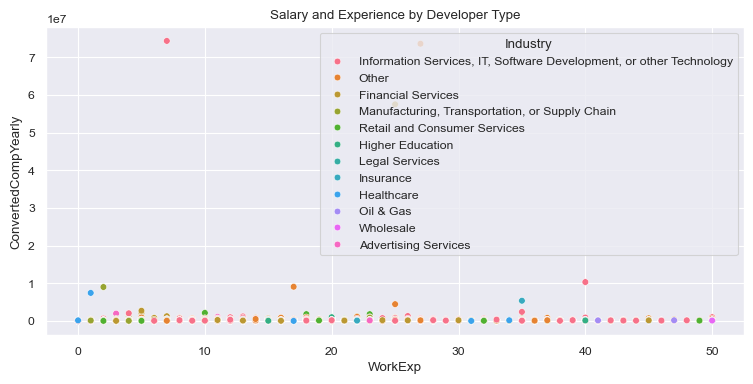

In [141]:
sns.scatterplot(data=df, x='WorkExp', y='ConvertedCompYearly', hue='Industry')
plt.title('Salary and Experience by Developer Type')
plt.show()

Most of respondents were working in Information Services, IT, Software Development, or other Technology.

#### % of Remote working respondenets

In [137]:
work_type = df['RemoteWork'].value_counts()
work_type

RemoteWork
Hybrid (some remote, some in-person)    31131
Remote                                  30566
In-person                               12113
Name: count, dtype: int64

In [138]:
work_type_index = work_type.index
total_valid_respondants = sum(work_type.values)
perc_remote = [(value/total_valid_respondants) * 100 for value in work_type.values]
perc_remote = [f'{round(value, 3)}%' for value in perc_remote]
# when you are setting value for the first time to the column, the column does not yet exists, so pandas creates a column
# and assigns value NaN to all of its elements. This makes Pandas think that the column's dtype is float64. Then it raises a warning.
# 'Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas.
# Value '['42.981%', '42.439%', '14.58%']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.'
# Hence create the column with some default value, e.g. empty string, before adding values to it
work_type["work_type_index"] = ""
work_type[work_type_index] = perc_remote
work_type

RemoteWork
Hybrid (some remote, some in-person)    42.177%
Remote                                  41.412%
In-person                               16.411%
work_type_index                                
Name: count, dtype: object

Majority of people work remotely or in hybrid arrangements. In-person workers get less annual pay on average.

#### Conclusion

- Most represented among the responses were full-stack developers (>25K responses), from the USA (>18K respondents), aged 25-34
- 
The most popular languages for data specialists are Python and SQL , while web development languages like JavaScript and HTML/CSS are opted by all respondent
- 
 Majority of respondents hold Bachelor's degree, while data specialists tend to have more Master's degrees compared to all responden
- s
As expected, post pandemic majority of respondents work remotely to some extent, with only approx. 16% respondents working fully in-per
- n. Surprisingly, there are stark differences in pay, with remote workers earning almost 70% more than those that work fully in-per
- n.
Respondents from the USA earned the most, with respondents from Australia and Switzerld   following ater.
